# English Premier League 2019-2020

The following Notebook is a statistical analysis for the 2019-2020 English Premier League.

The __Player__ dataset was taken from Kaggle.com

Link to the dataset: https://www.kaggle.com/idoyo92/epl-stats-20192020 (https://www.kaggle.com/idoyo92/epl-stats-20192020?select=players_1920_fin.csv)

The __Match__ dataset was taken from Football-Data.co.uk
Link to the dataset: http://www.football-data.co.uk/englandm.php (http://www.football-data.co.uk/mmz4281/1920/E0.csv)

---

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import datetime
from IPython.display import display_html 

plt.rcParams['figure.figsize'] = [12, 7]

## Dataset 1: Match Data

First we will organise the data for football matches

---

In [7]:
# Read the data from the dataset into a dataframe
incomplete_matches_df = pd.read_csv('epl-dataset/epl2020.csv')

In [8]:
incomplete_matches_df.head()

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


In the following result, we can see there are 576 rows

In [9]:
incomplete_matches_df.shape

(576, 45)

In [10]:
incomplete_matches_df.shape[0] / 2 # number of matches

288.0

In [11]:
# Display the last 5 rows
incomplete_matches_df.iloc[::-1].head()

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
575,576,h,2.412390,0.672448,1.651220,0.672448,8,2,4,0,...,12,0,1,0,1.36,5.25,8.0,0.466667,0.250000,Mon
574,575,a,0.672448,2.412390,0.672448,1.651220,2,8,0,4,...,12,0,1,0,1.36,5.25,8.0,0.466667,0.250000,Mon
573,574,h,1.738900,0.585469,1.738900,0.585469,3,2,2,0,...,9,11,4,0,5.00,4.33,1.6,0.500000,0.285714,Sun
572,573,a,0.585469,1.738900,0.585469,1.738900,2,3,0,2,...,9,11,4,0,5.00,4.33,1.6,0.500000,0.285714,Sun
571,572,a,0.445922,2.028830,0.445922,2.028830,3,9,0,4,...,10,1,2,0,1.80,3.90,4.2,0.647059,0.333333,Sun


In [12]:
# Get the date for the last match
incomplete_matches_df.iloc[-1].date

'2020-03-09 20:00:00'

This has led to discovery that the dataset is incomplete. A full season should contain a total of __380__ matches.
The shape of the data above indicates there are only 288 (576 / 2) matches contained in the dataset. 
Upon manual inspection of the data, we can see that the date for the last match in the dataset occurs on the 9th of March 2020. This coincides with when the Premier League was postponed due to Covid. The League resumed several weeks later, but the dataset does not include the final matches.

---

### Alternative Football Match Dataset

http://www.football-data.co.uk/mmz4281/1920/E0.csv

Link to the column names: http://www.football-data.co.uk/notes.txt

### Exploring The Data

In [13]:
matches_df = pd.read_csv('epl-dataset/matches.csv')

In [14]:
matches_df.shape

(380, 106)

In [15]:
matches_df.shape[0]

380

__380__ rows = 380 matches - The expected amount

---

In [16]:
matches_df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [17]:
matches_df.iloc[::-1].head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
379,E0,26/07/2020,16:00,West Ham,Aston Villa,1,1,D,0,0,...,2.03,0.00,1.93,1.97,1.95,1.98,1.99,2.00,1.93,1.95
378,E0,26/07/2020,16:00,Southampton,Sheffield United,3,1,H,0,1,...,2.01,-0.50,1.97,1.93,2.00,1.93,2.03,1.96,1.98,1.89
377,E0,26/07/2020,16:00,Newcastle,Liverpool,1,3,A,1,1,...,2.40,1.00,1.94,1.96,1.95,1.97,2.03,2.00,1.95,1.92
376,E0,26/07/2020,16:00,Man City,Norwich,5,0,H,2,0,...,5.77,-3.75,2.03,1.87,2.01,1.88,2.06,1.88,2.02,1.84
375,E0,26/07/2020,16:00,Leicester,Man United,0,2,A,0,0,...,2.03,0.50,1.89,2.01,1.88,2.05,1.94,2.05,1.86,2.02


In [18]:
matches_df.iloc[-1].Date

'26/07/2020'

This is the correct end date for the 2019-2020 Premier League. Last match: Sunday, 26 July 2020

---

### Removing Unneeded Columns

The dataset contains a lot of columns in relation to betting odds. This data is not needed for the analysis being conducted here, so this data can be removed.

In [19]:
# matches_df.drop([
#     'Div',
#     'B365H',
#     'B365D',
#     'B365A',
#     'BSH',
#     'BSD',
#     'BSA',
#     'BWH',
#     'BWD',
#     'BWA',
#     'GBH',
#     'GBD',
#     'GBA',
#     'IWH',
#     'IWD',
#     'IWA',
#     'LBH',  
# ], axis=1, inplace=True, errors='ignore')

Rather than removing columns, I thought it would be best to select the columns needed, as there are many more columns that I do not need. There is a lot more work to list the columns to remove.

In [20]:
matches_df = matches_df[[
    'Date',
    'Time', 
    'HomeTeam', 
    'AwayTeam', 
    'FTHG', 
    'FTAG', 
    'FTR', 
    'HTHG',
    'HTAG',
    'HTR',
    'Referee',
    'HS',
    'AS',
    'HST',
    'AST',
    'HF',
    'AF',
    'HC',
    'AC',
    'HY',
    'AY',
    'HR',
    'AR'
]]

In [21]:
matches_df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,...,7,5,9,9,11,2,0,2,0,0
1,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,...,3,9,6,13,1,1,2,2,0,0
2,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,...,3,3,10,19,3,4,2,1,0,0
3,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,...,4,3,6,12,2,7,0,0,0,0
4,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,...,2,3,16,14,6,2,2,1,0,1


---

### Renaming Columns

In [22]:
# http://www.football-data.co.uk/notes.txt

matches_df = matches_df.rename(columns={
    'Date': 'date',
    'Time': 'time',
    'HomeTeam': 'home_team',
    'AwayTeam': 'away_team',
    'Referee': 'referee',
    'FTHG': 'full_time_home_goals',
    'FTAG': 'full_time_away_goals',
    'FTR': 'full_time_result',
    'HTHG': 'half_time_home_goals',
    'HTAG': 'half_time_away_goals',
    'HTR': 'half_time_result',
    'HS': 'home_shots',
    'AS': 'away_shots',
    'HST': 'home_shots_on_target',
    'AST': 'away_shots_on_target',
    'HF': 'home_fouls',
    'AF': 'away_fouls',
    'HC': 'home_corners',
    'AC': 'away_corners',
    'HY': 'home_yellow_cards',
    'AY': 'away_yellow_cards',
    'HR': 'home_red_cards',
    'AR': 'away_red_cards'
})

In [23]:
matches_df.head()

,date,time,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,...,home_shots_on_target,away_shots_on_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,...,7,5,9,9,11,2,0,2,0,0
1,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,...,3,9,6,13,1,1,2,2,0,0
2,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,...,3,3,10,19,3,4,2,1,0,0
3,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,...,4,3,6,12,2,7,0,0,0,0
4,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,...,2,3,16,14,6,2,2,1,0,1


---

### Check for missing values (null values)

Looking at the overall column stats provided by Kaggle, they provide some __total__ stats on each column within the dataset which allows us to identify any columns that may contain invalid data. And vice verse, we are able to identify columns that contain only valid data, eg. 1 and 0 or Y and N. This enables us to figure out which columns will need to be tested. Unfortunatel with the new dataset from Football-Data.co.uk, there are no summary totals for the columns. Only the raw CSV is provided. We will need to perform some checks on the columns we need to ensure the data is complete and valid.

When we explore the Player data from Kaggle, these column summary totals will enable us to skip the need to check for null values within certain columns that appear to be complete.
We will still need to confirm there are no null values for the string value columns, such as the referee names, team names, day of the week, etc.

In [24]:
print(np.sum([matches_df.date.isnull()]))
print(np.sum([matches_df.time.isnull()]))
print(np.sum([matches_df.home_team.isnull()]))
print(np.sum([matches_df.away_team.isnull()]))
print(np.sum([matches_df.full_time_home_goals.isnull()]))
print(np.sum([matches_df.full_time_away_goals.isnull()]))
print(np.sum([matches_df.full_time_result.isnull()]))
print(np.sum([matches_df.half_time_home_goals.isnull()]))
print(np.sum([matches_df.half_time_away_goals.isnull()]))
print(np.sum([matches_df.half_time_result.isnull()]))
print(np.sum([matches_df.referee.isnull()]))
print(np.sum([matches_df.home_shots.isnull()]))
print(np.sum([matches_df.away_shots.isnull()]))
print(np.sum([matches_df.home_shots_on_target.isnull()]))
print(np.sum([matches_df.away_shots_on_target.isnull()]))
print(np.sum([matches_df.home_fouls.isnull()]))
print(np.sum([matches_df.away_fouls.isnull()]))
print(np.sum([matches_df.home_corners.isnull()]))
print(np.sum([matches_df.away_corners.isnull()]))
print(np.sum([matches_df.home_yellow_cards.isnull()]))
print(np.sum([matches_df.away_yellow_cards.isnull()]))
print(np.sum([matches_df.home_red_cards.isnull()]))
print(np.sum([matches_df.away_red_cards.isnull()]))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


---

### Ensure Data Types Are Correct

In [25]:
matches_df.dtypes

date                    object
time                    object
home_team               object
away_team               object
full_time_home_goals     int64
full_time_away_goals     int64
full_time_result        object
half_time_home_goals     int64
half_time_away_goals     int64
half_time_result        object
referee                 object
home_shots               int64
away_shots               int64
home_shots_on_target     int64
away_shots_on_target     int64
home_fouls               int64
away_fouls               int64
home_corners             int64
away_corners             int64
home_yellow_cards        int64
away_yellow_cards        int64
home_red_cards           int64
away_red_cards           int64
dtype: object

Most of the column datatypes in the dataset are correct. There are mostly integer values, eg. __full_time_home_goals__.

The __home_team__, __away_team__ and __referee__ columns are all strings (object). The __full_time_result__ and __half_time_result__ are single character strings (eg. A or H).

We need to change the type for the __date__ field in particular to a datetime64 type. 

We will also need to format the date to ensure the days and months are consistent. Without formatting, it will automatically assign the day as the month and vice versa.

In [26]:
# matches_df.Date = matches_df.Date.astype('datetime64[ns]')

# Format date to ensure consistency with days and months
matches_df.date = pd.to_datetime(matches_df.date.astype(str), format='%d/%m/%Y') 

In [27]:
# Format time
matches_df.time = pd.to_datetime(matches_df.time.astype('datetime64[ns]')) 
matches_df.time = matches_df.time.dt.time

In [28]:
matches_df.dtypes

date                    datetime64[ns]
time                            object
home_team                       object
away_team                       object
full_time_home_goals             int64
full_time_away_goals             int64
full_time_result                object
half_time_home_goals             int64
half_time_away_goals             int64
half_time_result                object
referee                         object
home_shots                       int64
away_shots                       int64
home_shots_on_target             int64
away_shots_on_target             int64
home_fouls                       int64
away_fouls                       int64
home_corners                     int64
away_corners                     int64
home_yellow_cards                int64
away_yellow_cards                int64
home_red_cards                   int64
away_red_cards                   int64
dtype: object

In [29]:
matches_df.head()

,date,time,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,...,home_shots_on_target,away_shots_on_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2019-08-09,20:00:00,Liverpool,Norwich,4,1,H,4,0,H,...,7,5,9,9,11,2,0,2,0,0
1,2019-08-10,12:30:00,West Ham,Man City,0,5,A,0,1,A,...,3,9,6,13,1,1,2,2,0,0
2,2019-08-10,15:00:00,Bournemouth,Sheffield United,1,1,D,0,0,D,...,3,3,10,19,3,4,2,1,0,0
3,2019-08-10,15:00:00,Burnley,Southampton,3,0,H,0,0,D,...,4,3,6,12,2,7,0,0,0,0
4,2019-08-10,15:00:00,Crystal Palace,Everton,0,0,D,0,0,D,...,2,3,16,14,6,2,2,1,0,1


---

### Move Date and Time Columns

There is no specific reason to move the date and time columns other than for cleanliness. The next step is to break out the dates and times into separate columns (day, month, year, etc.) so it will be cleaner to keep them at the end of the dataframe.

In [30]:
# Move Date and Time to the end of the dataframe

date = matches_df.date
time = matches_df.time

matches_df.drop(['date', 'time'], axis=1, inplace=True, errors='ignore')

matches_df['date'] = date
matches_df['time'] = time

In [31]:
matches_df.head()

,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,...,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,date,time
0,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,...,9,9,11,2,0,2,0,0,2019-08-09,20:00:00
1,West Ham,Man City,0,5,A,0,1,A,M Dean,5,...,6,13,1,1,2,2,0,0,2019-08-10,12:30:00
2,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,...,10,19,3,4,2,1,0,0,2019-08-10,15:00:00
3,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,...,6,12,2,7,0,0,0,0,2019-08-10,15:00:00
4,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,...,16,14,6,2,2,1,0,1,2019-08-10,15:00:00


---

### Separate Date Values

Create new columns for Year and Month

In [32]:
matches_df['year'] = matches_df.date.dt.year
matches_df['month'] = matches_df.date.dt.month
matches_df['day'] = matches_df.date.dt.day

In [33]:
matches_df.head()

,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,...,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,date,time,year,month,day
0,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,...,2,0,2,0,0,2019-08-09,20:00:00,2019,8,9
1,West Ham,Man City,0,5,A,0,1,A,M Dean,5,...,1,2,2,0,0,2019-08-10,12:30:00,2019,8,10
2,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,...,4,2,1,0,0,2019-08-10,15:00:00,2019,8,10
3,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,...,7,0,0,0,0,2019-08-10,15:00:00,2019,8,10
4,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,...,2,2,1,0,1,2019-08-10,15:00:00,2019,8,10


---

### Check Numerical Values

Ensure all numerical values that should not be negative are indeed non-negative.

In [34]:
matches_df.dtypes

home_team                       object
away_team                       object
full_time_home_goals             int64
full_time_away_goals             int64
full_time_result                object
half_time_home_goals             int64
half_time_away_goals             int64
half_time_result                object
referee                         object
home_shots                       int64
away_shots                       int64
home_shots_on_target             int64
away_shots_on_target             int64
home_fouls                       int64
away_fouls                       int64
home_corners                     int64
away_corners                     int64
home_yellow_cards                int64
away_yellow_cards                int64
home_red_cards                   int64
away_red_cards                   int64
date                    datetime64[ns]
time                            object
year                             int64
month                            int64
day                      

In [35]:
print(np.sum(matches_df.full_time_home_goals < 0))
print(np.sum(matches_df.full_time_away_goals < 0))
print(np.sum(matches_df.half_time_home_goals < 0))
print(np.sum(matches_df.half_time_away_goals < 0))
print(np.sum(matches_df.home_shots < 0))
print(np.sum(matches_df.away_shots < 0))
print(np.sum(matches_df.home_shots_on_target < 0))
print(np.sum(matches_df.away_shots_on_target < 0))
print(np.sum(matches_df.home_fouls < 0))
print(np.sum(matches_df.away_fouls < 0))
print(np.sum(matches_df.home_corners < 0))
print(np.sum(matches_df.away_corners < 0))
print(np.sum(matches_df.home_yellow_cards < 0))
print(np.sum(matches_df.away_yellow_cards < 0))
print(np.sum(matches_df.home_red_cards < 0))
print(np.sum(matches_df.away_red_cards < 0))
print(np.sum(matches_df.year < 0))
print(np.sum(matches_df.month < 0))
print(np.sum(matches_df.day < 0))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


---

### Check Team Names

Ensure the teams involved are correct. There should be 20 teams in total

In [36]:
unique_teams = np.sort(pd.unique(matches_df[['home_team', 'away_team']].values.ravel()))

unique_teams

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool',
       'Man City', 'Man United', 'Newcastle', 'Norwich',
       'Sheffield United', 'Southampton', 'Tottenham', 'Watford',
       'West Ham', 'Wolves'], dtype=object)

In [37]:
unique_teams.size

20

---

### Check Referees

Check for any invalid Referee names

In [38]:
unique_referee_names = np.sort(pd.unique(matches_df.referee))

unique_referee_names

array(['A Madley', 'A Marriner', 'A Taylor', 'C Kavanagh', 'C Pawson',
       'D Coote', 'D England', 'G Scott', 'J Moss', 'K Friend', 'L Mason',
       'M Atkinson', 'M Dean', 'M Oliver', 'O Langford', 'P Bankes',
       'P Tierney', 'R Jones', 'S Attwell', 'S Hooper', 'S Scott',
       'T Robinson'], dtype=object)

In [39]:
unique_referee_names.size

22

---

### Check Halftime & Fulltime Results

Ensure these 2 columns contain only __A__, __H__ and __D__ values. 

__A__ = Away

__H__ = Home

__D__ = Draw

In [40]:
unique_halftime_results = np.sort(pd.unique(matches_df.half_time_result))

unique_halftime_results

array(['A', 'D', 'H'], dtype=object)

In [41]:
unique_fulltime_results = np.sort(pd.unique(matches_df.full_time_result))

unique_fulltime_results

array(['A', 'D', 'H'], dtype=object)

---

### Check Date Range

Ensure dates of matches are between the start and end of the season.

In [42]:
sorted_matches_by_date = matches_df.sort_values('date')

In [43]:
# First day of the season

season_start_date = sorted_matches_by_date.date.iloc[0]

season_start_date

Timestamp('2019-08-09 00:00:00')

In [44]:
# Last day of the season

season_end_date = sorted_matches_by_date.date.iloc[-1] 

season_end_date

Timestamp('2020-07-26 00:00:00')

---
---
---

## Dataset 2: Player Data

In [45]:
players_df = pd.read_csv('epl-dataset/players.csv')

In [46]:
players_df.head()

,Unnamed: 0,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team,ppm
0,1,0,0,1,0,0.1,534,37,1,0,...,1,0,0,0,4.5,False,0,Aaron Connolly,Brighton,0.222222
1,2,0,0,1,0,0.3,534,43,1,0,...,1,10589,13500,2911,4.5,True,0,Aaron Connolly,Brighton,0.222222
2,3,0,0,1,0,4.8,534,58,0,0,...,1,8090,11749,3659,4.5,False,0,Aaron Connolly,Brighton,0.222222
3,4,0,0,2,0,0.6,534,63,1,0,...,1,8437,13439,5002,4.5,False,0,Aaron Connolly,Brighton,0.222222
4,5,0,3,53,1,23.8,534,72,0,2,...,13,2156,5952,3796,4.5,True,0,Aaron Connolly,Brighton,2.888889


In [47]:
players_df.shape

(22502, 35)

---

### Ensure Player Data Is Complete

In [48]:
sorted_players_by_date = players_df.sort_values('kickoff_time')

sorted_players_by_date.iloc[::-1].head()

,Unnamed: 0,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team,ppm
22501,22502,0,0,0,0,0.0,27,380,0,0,...,0,-1114,230,1344,4.3,False,0,?rjan Nyland,Aston Villa,0.0
15601,15602,0,0,18,0,1.7,143,375,3,0,...,0,13696,16494,2798,5.2,True,1,Michael Keane,Everton,0.0
21858,21859,0,0,0,0,0.0,428,380,0,0,...,0,-154,137,291,5.4,False,0,Wesley Moraes,Aston Villa,0.0
15426,15427,0,0,0,0,0.0,136,374,0,0,...,0,-8,14,22,5.2,True,0,Max Meyer,Crystal Palace,0.0
15435,15436,0,0,0,0,0.0,640,372,0,0,...,0,37,170,133,4.5,True,0,Max Thompson,Burnley,0.0


In [49]:
sorted_players_by_date.iloc[-1].kickoff_time

'2020-07-26 15:00:00'

We can see that there are player records from the 26th of July, which we have already discovered was the last day of the Premier League 2019-2020 season. For now, we can assume the data is complete. We will confirm that with more tests at a later point.

### Remove Unneeded Columns

This dataset contains a lot of columns related to the Fantasy Premier League, such as the player's price (value), points earned, transfers, etc. We are not concerned with these, so we can remove them.

In [50]:
players_df.drop([
    'Unnamed: 0',
    'bonus',
    'bps',
    'creativity',
    'ict_index',
    'selected',
    'total_points',
    'transfers_balance',
    'transfers_in',
    'transfers_out',
    'value',
    'ppm'
], axis=1, inplace=True, errors='ignore')

In [51]:
players_df.head()

,assists,clean_sheets,element,fixture,goals_conceded,goals_scored,influence,kickoff_time,minutes,opponent_team,...,red_cards,round,saves,team_a_score,team_h_score,threat,was_home,yellow_cards,full,team
0,0,0,534,37,1,0,0.2,2019-08-31 14:00:00,24,Man City,...,0,4,0,0,4,0,False,0,Aaron Connolly,Brighton
1,0,0,534,43,1,0,1.0,2019-09-14 14:00:00,6,Burnley,...,0,5,0,1,1,21,True,0,Aaron Connolly,Brighton
2,0,0,534,58,0,0,2.0,2019-09-21 16:30:00,20,Newcastle United,...,0,6,0,0,0,18,False,0,Aaron Connolly,Brighton
3,0,0,534,63,1,0,0.2,2019-09-28 14:00:00,25,Chelsea,...,0,7,0,0,2,0,False,0,Aaron Connolly,Brighton
4,0,1,534,72,0,2,70.2,2019-10-05 11:30:00,79,Tottenham,...,0,8,0,0,3,107,True,0,Aaron Connolly,Brighton


---

### Renaming Columns

In [52]:
players_df = players_df.rename(columns={
    'full': 'player_name',
    'element': 'player_id',
    'round': 'game_week'
})

---

### Check for missing values (null values)

CHecking all columns for any null values

In [57]:
print(np.sum([players_df.assists.isnull()]))
print(np.sum([players_df.clean_sheets.isnull()]))
print(np.sum([players_df.player_id.isnull()]))
print(np.sum([players_df.fixture.isnull()]))
print(np.sum([players_df.goals_conceded.isnull()]))
print(np.sum([players_df.goals_scored.isnull()]))
print(np.sum([players_df.influence.isnull()]))
print(np.sum([players_df.kickoff_time.isnull()]))
print(np.sum([players_df.minutes.isnull()]))
print(np.sum([players_df.opponent_team.isnull()]))
print(np.sum([players_df.own_goals.isnull()]))
print(np.sum([players_df.penalties_missed.isnull()]))
print(np.sum([players_df.penalties_saved.isnull()]))
print(np.sum([players_df.red_cards.isnull()]))
print(np.sum([players_df.game_week.isnull()]))
print(np.sum([players_df.saves.isnull()]))
print(np.sum([players_df.team_a_score.isnull()]))
print(np.sum([players_df.team_h_score.isnull()]))
print(np.sum([players_df.threat.isnull()]))
print(np.sum([players_df.was_home.isnull()]))
print(np.sum([players_df.yellow_cards.isnull()]))
print(np.sum([players_df.player_name.isnull()]))
print(np.sum([players_df.team.isnull()]))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


There are no null values in the dataset. 

---

### Ensure Data Types Are Correct

In [58]:
players_df.dtypes

assists               int64
clean_sheets          int64
player_id             int64
fixture               int64
goals_conceded        int64
goals_scored          int64
influence           float64
kickoff_time         object
minutes               int64
opponent_team        object
own_goals             int64
penalties_missed      int64
penalties_saved       int64
red_cards             int64
game_week             int64
saves                 int64
team_a_score          int64
team_h_score          int64
threat                int64
was_home               bool
yellow_cards          int64
player_name          object
team                 object
dtype: object

All integer columns are correct by default. 

The __kickoff_time__ and __date__ columns need to be changed from object to datetime.

In [60]:
players_df.kickoff_time = pd.to_datetime(players_df.kickoff_time.astype('datetime64[ns]')) 

In [61]:
players_df.head()

,assists,clean_sheets,player_id,fixture,goals_conceded,goals_scored,influence,kickoff_time,minutes,opponent_team,...,red_cards,game_week,saves,team_a_score,team_h_score,threat,was_home,yellow_cards,player_name,team
0,0,0,534,37,1,0,0.2,2019-08-31 14:00:00,24,Man City,...,0,4,0,0,4,0,False,0,Aaron Connolly,Brighton
1,0,0,534,43,1,0,1.0,2019-09-14 14:00:00,6,Burnley,...,0,5,0,1,1,21,True,0,Aaron Connolly,Brighton
2,0,0,534,58,0,0,2.0,2019-09-21 16:30:00,20,Newcastle United,...,0,6,0,0,0,18,False,0,Aaron Connolly,Brighton
3,0,0,534,63,1,0,0.2,2019-09-28 14:00:00,25,Chelsea,...,0,7,0,0,2,0,False,0,Aaron Connolly,Brighton
4,0,1,534,72,0,2,70.2,2019-10-05 11:30:00,79,Tottenham,...,0,8,0,0,3,107,True,0,Aaron Connolly,Brighton


In [62]:
players_df.dtypes

assists                      int64
clean_sheets                 int64
player_id                    int64
fixture                      int64
goals_conceded               int64
goals_scored                 int64
influence                  float64
kickoff_time        datetime64[ns]
minutes                      int64
opponent_team               object
own_goals                    int64
penalties_missed             int64
penalties_saved              int64
red_cards                    int64
game_week                    int64
saves                        int64
team_a_score                 int64
team_h_score                 int64
threat                       int64
was_home                      bool
yellow_cards                 int64
player_name                 object
team                        object
dtype: object

---

### Separate Date Values

In [64]:
players_df['date'] = players_df.kickoff_time.dt.date
players_df['time'] = players_df.kickoff_time.dt.time
players_df['year'] = players_df.kickoff_time.dt.year
players_df['month'] = players_df.kickoff_time.dt.month
players_df['day'] = players_df.kickoff_time.dt.day

In [65]:
players_df.date = pd.to_datetime(players_df.date.astype('datetime64[ns]')) 

In [66]:
players_df.head()

,assists,clean_sheets,player_id,fixture,goals_conceded,goals_scored,influence,kickoff_time,minutes,opponent_team,...,threat,was_home,yellow_cards,player_name,team,date,time,year,month,day
0,0,0,534,37,1,0,0.2,2019-08-31 14:00:00,24,Man City,...,0,False,0,Aaron Connolly,Brighton,2019-08-31,14:00:00,2019,8,31
1,0,0,534,43,1,0,1.0,2019-09-14 14:00:00,6,Burnley,...,21,True,0,Aaron Connolly,Brighton,2019-09-14,14:00:00,2019,9,14
2,0,0,534,58,0,0,2.0,2019-09-21 16:30:00,20,Newcastle United,...,18,False,0,Aaron Connolly,Brighton,2019-09-21,16:30:00,2019,9,21
3,0,0,534,63,1,0,0.2,2019-09-28 14:00:00,25,Chelsea,...,0,False,0,Aaron Connolly,Brighton,2019-09-28,14:00:00,2019,9,28
4,0,1,534,72,0,2,70.2,2019-10-05 11:30:00,79,Tottenham,...,107,True,0,Aaron Connolly,Brighton,2019-10-05,11:30:00,2019,10,5


---

### Check Numerical Values

Ensure all numerical values that should not be negative are indeed non-negative.

In [67]:
print(np.sum(players_df.assists < 0))
print(np.sum(players_df.clean_sheets < 0))
print(np.sum(players_df.player_id < 0))
print(np.sum(players_df.fixture < 0))
print(np.sum(players_df.goals_conceded < 0))
print(np.sum(players_df.goals_scored < 0))
print(np.sum(players_df.influence < 0))
print(np.sum(players_df.own_goals < 0))
print(np.sum(players_df.penalties_missed < 0))
print(np.sum(players_df.penalties_saved < 0))
print(np.sum(players_df.red_cards < 0))
print(np.sum(players_df.game_week < 0))
print(np.sum(players_df.saves < 0))
print(np.sum(players_df.team_a_score < 0))
print(np.sum(players_df.team_h_score < 0))
print(np.sum(players_df.threat < 0))
print(np.sum(players_df.yellow_cards < 0))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


All results are __0__, indicating that none of the numerical values are negative. This is the result we wanted.

---

### Check Player Names

In [68]:
unique_player_names = np.sort(pd.unique(players_df.player_name))

In [69]:
unique_player_names

array(['?aglar S?y?nc?', '?rjan Nyland', 'Aaron Connolly',
       'Aaron Cresswell', 'Aaron Lennon', 'Aaron Mooy', 'Aaron Ramsdale',
       'Aaron Wan-Bissaka', 'Abd-Al-Ali Morakinyo Olaposi Koiki',
       'Abdoulaye Doucour?', 'Adalberto Pe?aranda', 'Adam Idah',
       'Adam Lallana', 'Adam Masina', 'Adam Smith', 'Adam Webster',
       'Adama Traor?', 'Addji Keaninkin Marc-Israel Guehi',
       'Ademola Lookman', 'Adri?n San Miguel del Castillo',
       'Adrian Mariappa', 'Ahmed El Mohamady', 'Ainsley Maitland-Niles',
       'Akin Famewo', 'Albian Ajeti', 'Alex Cochrane', 'Alex Iwobi',
       'Alex McCarthy', 'Alex Oxlade-Chamberlain', 'Alexander Tettey',
       'Alexandre Jankewitz', 'Alexandre Lacazette',
       'Alexandre Nascimento Costa Silva', 'Alexis Mac Allister',
       'Alexis S?nchez', 'Alfie Lewis', 'Alfie Whiteman',
       'Alireza Jahanbakhsh', 'Alisson Ramses Becker',
       'Allan Saint-Maximin', 'Andr? Filipe Tavares Gomes', 'Andre Gray',
       'Andre Green', 'Andrea

I have noticed that there are some player names with question marks (?) in their names. They likely have some non Unicode characters.

For now, there are many entries with this problem but we can ignore it for now as it doesn't cause any issues with data calculations.

---

### Check Player Team Names

In [70]:
unique_player_teams = np.sort(pd.unique(players_df.team))

unique_player_teams

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool',
       'Man City', 'Man Utd', 'Newcastle United', 'Norwich',
       'Sheffield United', 'Southampton', 'Tottenham', 'Watford',
       'West Ham', 'Wolves'], dtype=object)

In [71]:
unique_player_teams.size

20

In [72]:
unique_player_opponent_teams = np.sort(pd.unique(players_df.opponent_team))

unique_player_opponent_teams

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool',
       'Man City', 'Man Utd', 'Newcastle United', 'Norwich',
       'Sheffield United', 'Southampton', 'Tottenham', 'Watford',
       'West Ham', 'Wolves'], dtype=object)

In [73]:
unique_player_opponent_teams.size

20

---

## Ensuring Consistency Across Datasets

In [74]:
unique_player_teams == unique_player_opponent_teams

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Ensure that the list of teams from the __Player Dataset__ match the list of teams from the __Match Dataset__ 

In [75]:
team_differences = unique_player_teams == unique_teams

team_differences

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True])

__Note:__ 2 values have come up false, so we need to figure out why these values don't match

In [76]:
print(unique_player_teams[team_differences])

['Arsenal' 'Aston Villa' 'Bournemouth' 'Brighton' 'Burnley' 'Chelsea'
 'Crystal Palace' 'Everton' 'Leicester' 'Liverpool' 'Man City' 'Norwich'
 'Sheffield United' 'Southampton' 'Tottenham' 'Watford' 'West Ham'
 'Wolves']


These are the teams that match up correctly. This is not what we want to see. So we need to invert the boolean values

In [77]:
inverted_team_differences = np.invert(team_differences)

In [78]:
print(unique_player_teams[inverted_team_differences])
print(unique_teams[inverted_team_differences])

['Man Utd' 'Newcastle United']
['Man United' 'Newcastle']


So we can see the difference between the 2 sets of data. 

__Man Utd__ / __Man United__

__Newcastle United__ / __Newcastle__

To fix this, we need to make all values consistent across both datasets.

I have decided to ensure all occurrences across all team columns will be __Man United__ and __Newcastle United__

In [79]:
players_df.loc[players_df['team'] == 'Man Utd', 'team'] = 'Man United'
players_df.loc[players_df['opponent_team'] == 'Man Utd', 'opponent_team'] = 'Man United'

In [80]:
unique_player_teams = np.sort(pd.unique(players_df.team))
unique_player_opponent_teams = np.sort(pd.unique(players_df.opponent_team))

print(unique_player_teams)
print(unique_player_opponent_teams)

['Arsenal' 'Aston Villa' 'Bournemouth' 'Brighton' 'Burnley' 'Chelsea'
 'Crystal Palace' 'Everton' 'Leicester' 'Liverpool' 'Man City'
 'Man United' 'Newcastle United' 'Norwich' 'Sheffield United'
 'Southampton' 'Tottenham' 'Watford' 'West Ham' 'Wolves']
['Arsenal' 'Aston Villa' 'Bournemouth' 'Brighton' 'Burnley' 'Chelsea'
 'Crystal Palace' 'Everton' 'Leicester' 'Liverpool' 'Man City'
 'Man United' 'Newcastle United' 'Norwich' 'Sheffield United'
 'Southampton' 'Tottenham' 'Watford' 'West Ham' 'Wolves']


In [81]:
matches_df.loc[matches_df['home_team'] == 'Newcastle', 'home_team'] = 'Newcastle United'
matches_df.loc[matches_df['away_team'] == 'Newcastle', 'away_team'] = 'Newcastle United'

In [82]:
unique_teams = np.sort(pd.unique(matches_df[['home_team', 'away_team']].values.ravel()))

unique_teams

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool',
       'Man City', 'Man United', 'Newcastle United', 'Norwich',
       'Sheffield United', 'Southampton', 'Tottenham', 'Watford',
       'West Ham', 'Wolves'], dtype=object)

In [83]:
unique_player_teams == unique_player_opponent_teams

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [84]:
unique_player_teams == unique_teams

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Every boolean value is __True__ - The value we want. All team names are consistent across all columns now.

---

### Players Per Match

In [85]:
print(matches_df.shape[0])
print(players_df.shape[0])

380
22502


Divide the number of players by the number of games

In [86]:
players_per_match = players_df.shape[0] / matches_df.shape[0]

players_per_match

59.21578947368421

In [87]:
players_per_team = players_per_match / 2

players_per_team

29.607894736842105

With a result of __29__, we can assume there was an __average of 29 players per team squad per match__ for the 2019-2020 season.

We will need to figure out what players actually played each match.

In [88]:
players_who_played = players_df[players_df.minutes > 0]
players_per_match = players_who_played.shape[0] / matches_df.shape[0]

players_per_match

27.931578947368422

In [89]:
players_per_team = players_per_match / 2

players_per_team

13.965789473684211

In [90]:
players_per_team = round(players_per_team)

players_per_team

14

With 14 plyers per team per match, this aligns correctly with the expected result. Each team will have 11 players, with up to 3 substitutes in a normal situation. A team does not always use their subs, so the number would be expected to be below 14. The average could have been brought up closer to 14 due to a rule change after the Covid break which allowed up to 5 subs per team per match.

The Premier League took a break from the 9th of March 2020. 
We can check the average before and after to see the difference in player count per team per match.

In [91]:
covid_break_date = datetime.datetime(2020, 3, 9, 23, 59)

print(covid_break_date)

2020-03-09 23:59:00


In [92]:
pre_covid_players = players_who_played[players_who_played.date < covid_break_date]
post_covid_players = players_who_played[players_who_played.date > covid_break_date]

print(pre_covid_players.shape[0], 'Pre Covid Players')
print(post_covid_players.shape[0], 'Post Covid Players')

7899 Pre Covid Players
2715 Post Covid Players


In [93]:
players_who_played.shape[0] == pre_covid_players.shape[0] + post_covid_players.shape[0]

True

In [94]:
pre_covid_matches = matches_df[matches_df.date < covid_break_date]
post_covid_matches = matches_df[matches_df.date > covid_break_date]

print(pre_covid_matches.shape[0], 'Pre Covid Matches')
print(post_covid_matches.shape[0], 'Post Covid Matches')

288 Pre Covid Matches
92 Post Covid Matches


In [95]:
matches_df.shape[0] == pre_covid_matches.shape[0] + post_covid_matches.shape[0]

True

#### Pre Covid: Average Players Per Team Per Match

In [96]:
players_per_match_pre_covid = pre_covid_players.shape[0] / pre_covid_matches.shape[0]
players_per_team_pre_covid = players_per_match_pre_covid / 2

print(players_per_match_pre_covid, 'Players Per Match Pre Covid')
print(players_per_team_pre_covid, 'Players Per Team Per Match Pre Covid')

27.427083333333332 Players Per Match Pre Covid
13.713541666666666 Players Per Team Per Match Pre Covid


#### Post Covid: Average Players Per Team Per Match

In [97]:
players_per_match_post_covid = post_covid_players.shape[0] / post_covid_matches.shape[0]
players_per_team_post_covid = players_per_match_post_covid / 2

print(players_per_match_post_covid, 'Players Per Match Post Covid')
print(players_per_team_post_covid, 'Players Per Team Per Match Post Covid')

29.51086956521739 Players Per Match Post Covid
14.755434782608695 Players Per Team Per Match Post Covid


We can see from the above information that we have proven that there were more players used per team per match after the Covid break with a team's ability to bring on more substitutes during the game.

On average, each team was using one extra sub during the game.

---

### Visualising Covid Break

In [98]:
season_length_in_days = (season_end_date - season_start_date).days

season_length_in_days

352

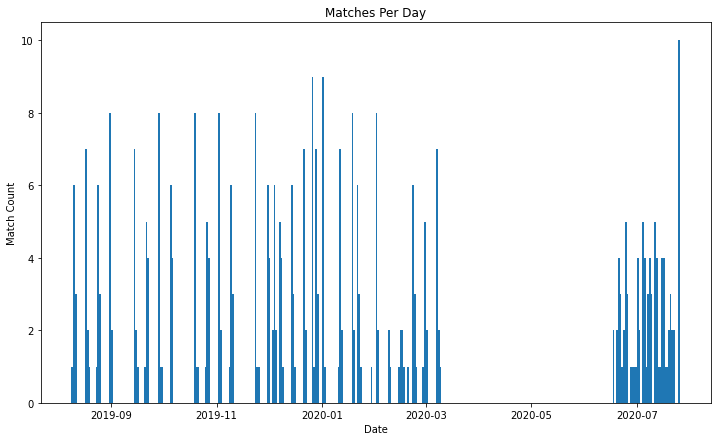

In [99]:
plt.hist(matches_df.date, bins=season_length_in_days)
plt.xlabel('Date')
plt.ylabel('Match Count')
plt.title('Matches Per Day')

plt.show();

We can see the significant gap between the matches. This is the Covid break. 
We can also see increase in volume of matches after the break. The Premier League was running behind schedule due to the game, so they played the remaining matches in a much shorter amount of time.

---

### Visualising Substitute Numbers

In [100]:
team_match_players_played = players_who_played.groupby(['team', 'date']).size().reset_index(name='player_count').sort_values('date')

team_match_players_played['substitute_count'] = team_match_players_played.player_count - 11

team_match_players_played

,team,date,player_count,substitute_count
342,Liverpool,2019-08-09,14,3
494,Norwich,2019-08-09,14,3
532,Sheffield United,2019-08-10,14,3
684,West Ham,2019-08-10,14,3
380,Man City,2019-08-10,14,3
...,...,...,...,...
569,Sheffield United,2020-07-26,14,3
607,Southampton,2020-07-26,14,3
645,Tottenham,2020-07-26,15,4
341,Leicester,2020-07-26,16,5


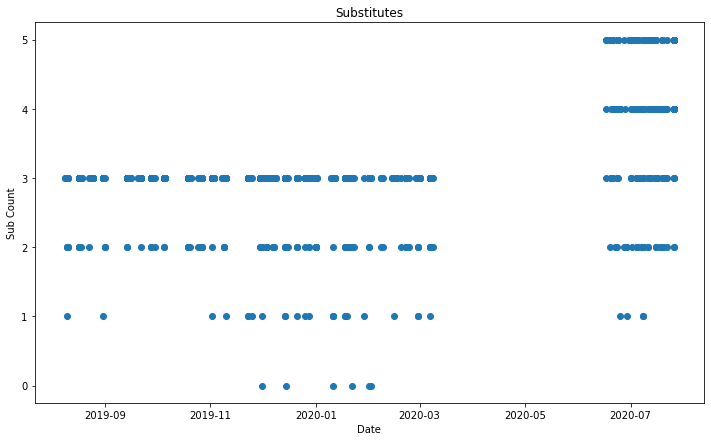

In [101]:
plt.scatter(team_match_players_played.date, team_match_players_played.substitute_count)
plt.xlabel('Date')
plt.ylabel('Sub Count')
plt.title('Substitutes')

plt.show();

We can see from the scatter plot graph above that there was never more than 3 substitutes used before the Covid break in March. When the new rule came into effect after the Break, teams were allowed up to 5 substitutes, which is evident in the graph.

In [102]:
sub_count_frequencies = team_match_players_played.groupby(['team', 'substitute_count']).size().reset_index(name='sub_count_frequency')

sub_count_frequencies

,team,substitute_count,sub_count_frequency
0,Arsenal,1,1
1,Arsenal,2,4
2,Arsenal,3,23
3,Arsenal,4,5
4,Arsenal,5,5
...,...,...,...
83,Wolves,1,4
84,Wolves,2,8
85,Wolves,3,20
86,Wolves,4,3


In [103]:
zero_sub_frequencies = sub_count_frequencies[sub_count_frequencies.substitute_count == 0]

zero_sub_frequencies

,team,substitute_count,sub_count_frequency
10,Bournemouth,0,1
18,Burnley,0,2
22,Chelsea,0,1
82,Wolves,0,2


In [104]:
zero_sub_frequencies.shape[0]

4

Interestingly, on a few occasions, 4 teams listed above used zero of their substitutes. As seen in the scatter plot graph above, this would have occurred before the Covid break.

In [105]:
five_sub_frequencies = sub_count_frequencies[sub_count_frequencies.substitute_count == 5]

five_sub_frequencies

,team,substitute_count,sub_count_frequency
4,Arsenal,5,5
9,Aston Villa,5,1
14,Bournemouth,5,6
17,Brighton,5,8
26,Chelsea,5,2
34,Everton,5,4
38,Leicester,5,3
42,Liverpool,5,7
47,Man City,5,4
51,Man United,5,5


In [106]:
five_sub_frequencies.shape[0]

16

In [107]:
five_sub_frequencies.iloc[five_sub_frequencies['sub_count_frequency'].argmax()]

team                   Brighton
substitute_count              5
sub_count_frequency           8
Name: 17, dtype: object

In [108]:
five_sub_frequencies.sort_values('sub_count_frequency', ascending=False)

,team,substitute_count,sub_count_frequency
17,Brighton,5,8
42,Liverpool,5,7
14,Bournemouth,5,6
61,Norwich,5,6
4,Arsenal,5,5
51,Man United,5,5
34,Everton,5,4
47,Man City,5,4
56,Newcastle United,5,4
38,Leicester,5,3


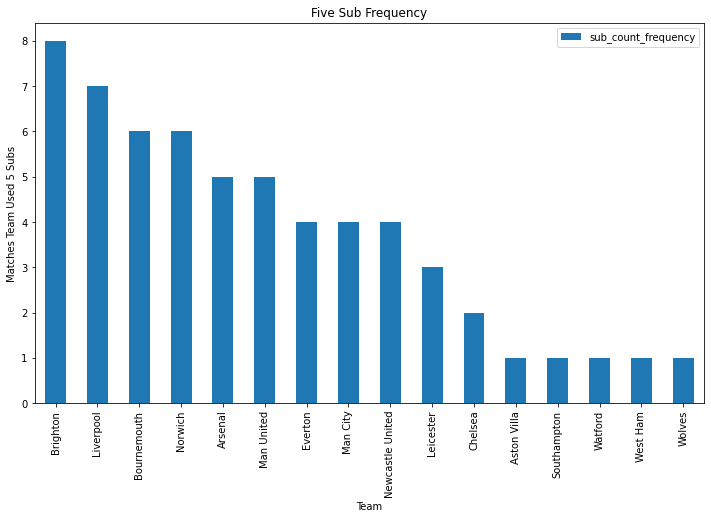

In [109]:
highest_five_sub_teams = five_sub_frequencies[['team', 'sub_count_frequency']].sort_values('sub_count_frequency', ascending=False)

highest_five_sub_teams.set_index('team').plot(kind = 'bar')
plt.xlabel('Team')
plt.ylabel('Matches Team Used 5 Subs')
plt.title('Five Sub Frequency')

plt.show();

After the Covid break, 16 teams took the opportunity to use 5 subs in their matches.
Brighton used their five-sub allowance the most, taking the opporunity in 8 different matches.

---

### Playing Full Matches

This should be similar, but the opposite to the substitute data we saw previously. 

Here we want to visualise how many players played the full match.

In [110]:
players_df[players_df.minutes > 90].shape

(0, 28)

This dataset only accounts for up to 90 minutes of playing time per player per match. Any amount of time after the 90th minutes is not counted as extra minutes, but rather the replacement for any minutes during the match that were wasted due to injuries, substitutions, etc.

So we can assume that if a player played 90 minutes, they played the full match.

In [111]:
full_match_players = players_df[players_df.minutes == 90].groupby(['date', 'team']).size().reset_index(name='full_match_count')

full_match_players

,date,team,full_match_count
0,2019-08-09,Liverpool,8
1,2019-08-09,Norwich,8
2,2019-08-10,Aston Villa,8
3,2019-08-10,Bournemouth,10
4,2019-08-10,Brighton,9
...,...,...,...
755,2020-07-26,Southampton,9
756,2020-07-26,Tottenham,8
757,2020-07-26,Watford,7
758,2020-07-26,West Ham,7


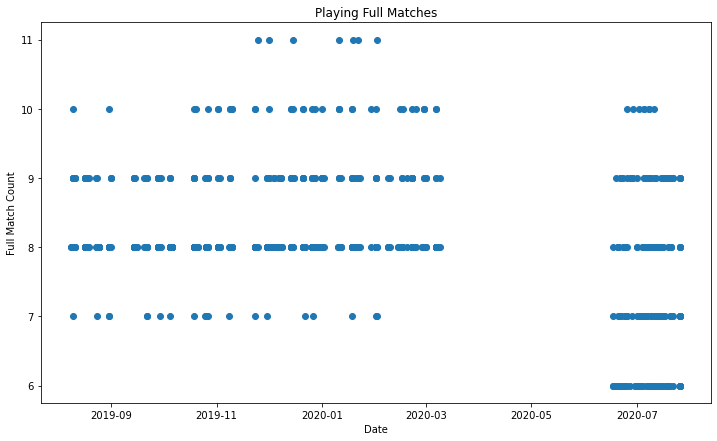

In [112]:
plt.scatter(full_match_players.date, full_match_players.full_match_count)
plt.xlabel('Date')
plt.ylabel('Full Match Count')
plt.title('Playing Full Matches')

plt.show();

---

In [113]:
matches_df.head()

,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,...,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,date,time,year,month,day
0,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,...,2,0,2,0,0,2019-08-09,20:00:00,2019,8,9
1,West Ham,Man City,0,5,A,0,1,A,M Dean,5,...,1,2,2,0,0,2019-08-10,12:30:00,2019,8,10
2,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,...,4,2,1,0,0,2019-08-10,15:00:00,2019,8,10
3,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,...,7,0,0,0,0,2019-08-10,15:00:00,2019,8,10
4,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,...,2,2,1,0,1,2019-08-10,15:00:00,2019,8,10


In [114]:
players_df.head()

,assists,clean_sheets,player_id,fixture,goals_conceded,goals_scored,influence,kickoff_time,minutes,opponent_team,...,threat,was_home,yellow_cards,player_name,team,date,time,year,month,day
0,0,0,534,37,1,0,0.2,2019-08-31 14:00:00,24,Man City,...,0,False,0,Aaron Connolly,Brighton,2019-08-31,14:00:00,2019,8,31
1,0,0,534,43,1,0,1.0,2019-09-14 14:00:00,6,Burnley,...,21,True,0,Aaron Connolly,Brighton,2019-09-14,14:00:00,2019,9,14
2,0,0,534,58,0,0,2.0,2019-09-21 16:30:00,20,Newcastle United,...,18,False,0,Aaron Connolly,Brighton,2019-09-21,16:30:00,2019,9,21
3,0,0,534,63,1,0,0.2,2019-09-28 14:00:00,25,Chelsea,...,0,False,0,Aaron Connolly,Brighton,2019-09-28,14:00:00,2019,9,28
4,0,1,534,72,0,2,70.2,2019-10-05 11:30:00,79,Tottenham,...,107,True,0,Aaron Connolly,Brighton,2019-10-05,11:30:00,2019,10,5


---

### Is Home Advantage Real Effected By Fans (Or Lack Of)?

People often speak about teams having a __Home Advantage__ in football. This implies that a team is more likely to win when playing in their home stadium, with the majority of the fans being their own. 

We want to prove if that is true and if having no fans at the stadium effects a teams chance of winning.

Do teams win more when the play at home?

Did teams lose that advantage after the Covid break due to a lack of home fans in the stadium?

Given the above assumption about the Home Advantage, after the Covid break with no fans being allowed into the stadiums, we expected to see teams losing this advantage.

In [115]:
home_win_matches = matches_df[matches_df.full_time_result == 'H']

len(home_win_matches)

172

In [116]:
away_win_matches = matches_df[matches_df.full_time_result == 'A']

len(away_win_matches)

116

In [117]:
draw_matches = matches_df[matches_df.full_time_result == 'D']

len(draw_matches)

92

We can see from the above results that overall, a team that plays at home is more likely to win. But this doesn't fully prove anything. We need to investigate more.

Which team wins at home the most?

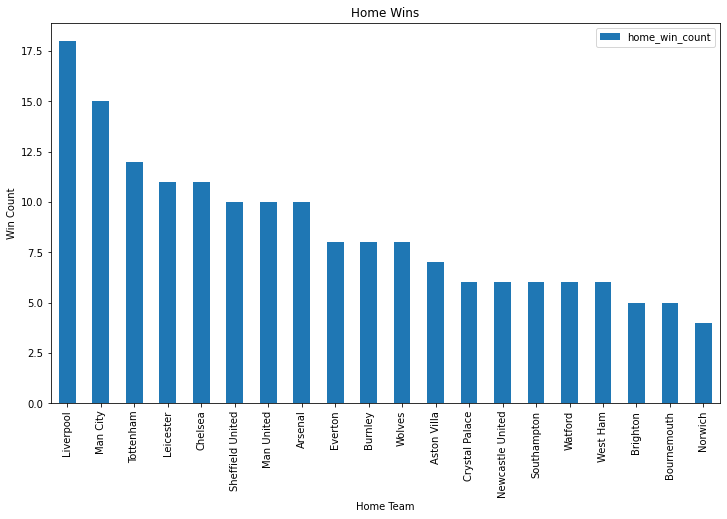

In [118]:
sorted_home_win_matches = home_win_matches.groupby(['home_team']).size().reset_index(name='home_win_count').sort_values('home_win_count', ascending=False)

sorted_home_win_matches.set_index('home_team').plot(kind = 'bar')
plt.xlabel('Home Team')
plt.ylabel('Win Count')
plt.title('Home Wins')

plt.show();

Which team wins at away the most?

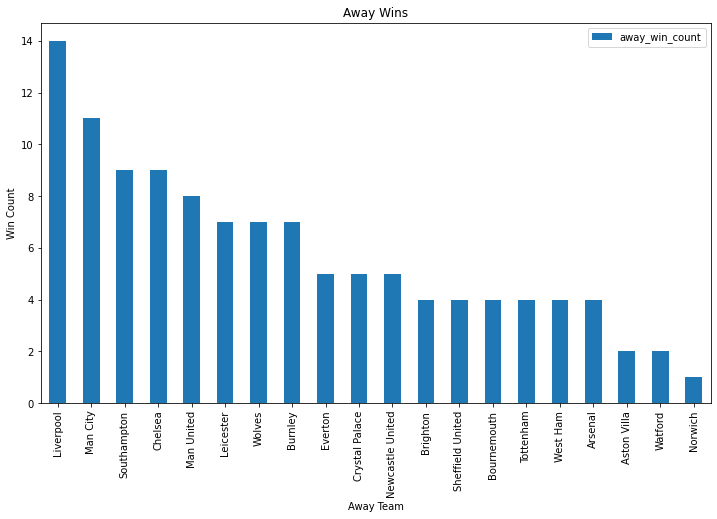

In [119]:
sorted_away_win_matches = away_win_matches.groupby(['away_team']).size().reset_index(name='away_win_count').sort_values('away_win_count', ascending=False)

sorted_away_win_matches.set_index('away_team').plot(kind = 'bar')
plt.xlabel('Away Team')
plt.ylabel('Win Count')
plt.title('Away Wins')

plt.show();

In [120]:
pre_covid_home_win_matches = home_win_matches[home_win_matches.date < covid_break_date]
post_covid_home_win_matches = home_win_matches[home_win_matches.date > covid_break_date]

pre_covid_away_win_matches = away_win_matches[away_win_matches.date < covid_break_date]
post_covid_away_win_matches = away_win_matches[away_win_matches.date > covid_break_date]

pre_covid_draw_matches = draw_matches[draw_matches.date < covid_break_date]
post_covid_draw_matches = draw_matches[draw_matches.date > covid_break_date]

In [121]:
pre_covid_home_win_matches.head()

,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,...,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,date,time,year,month,day
0,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,...,2,0,2,0,0,2019-08-09,20:00:00,2019,8,9
3,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,...,7,0,0,0,0,2019-08-10,15:00:00,2019,8,10
6,Tottenham,Aston Villa,3,1,H,0,1,A,C Kavanagh,31,...,0,1,0,0,0,2019-08-10,17:30:00,2019,8,10
9,Man United,Chelsea,4,0,H,1,0,H,A Taylor,11,...,5,3,4,0,0,2019-08-11,16:30:00,2019,8,11
10,Arsenal,Burnley,2,1,H,1,1,D,M Dean,16,...,7,2,1,0,0,2019-08-17,12:30:00,2019,8,17


In [122]:
print(len(pre_covid_home_win_matches))
print(len(pre_covid_matches))

129
288


In [123]:
post_covid_home_win_matches.head()

,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,...,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,date,time,year,month,day
289,Man City,Arsenal,3,0,H,1,0,H,A Taylor,20,...,2,1,1,0,1,2020-06-17,20:15:00,2020,6,17
293,Brighton,Arsenal,2,1,H,0,0,D,M Atkinson,9,...,7,2,1,0,0,2020-06-20,15:00:00,2020,6,20
296,Newcastle United,Sheffield United,3,0,H,0,0,D,D Coote,12,...,4,2,0,0,1,2020-06-21,14:00:00,2020,6,21
299,Man City,Burnley,5,0,H,3,0,H,A Marriner,19,...,1,1,1,0,0,2020-06-22,20:00:00,2020,6,22
301,Tottenham,West Ham,2,0,H,0,0,D,C Pawson,15,...,4,2,2,0,0,2020-06-23,20:15:00,2020,6,23


In [124]:
print(len(post_covid_home_win_matches))
print(len(post_covid_matches))

43
92


In [125]:
pre_covid_away_win_matches.head()

,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,...,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,date,time,year,month,day
1,West Ham,Man City,0,5,A,0,1,A,M Dean,5,...,1,2,2,0,0,2019-08-10,12:30:00,2019,8,10
5,Watford,Brighton,0,3,A,0,1,A,C Pawson,11,...,2,0,1,0,0,2019-08-10,15:00:00,2019,8,10
8,Newcastle United,Arsenal,0,1,A,0,0,D,M Atkinson,9,...,3,1,3,0,0,2019-08-11,14:00:00,2019,8,11
11,Aston Villa,Bournemouth,1,2,A,0,2,A,M Atkinson,22,...,5,0,2,0,0,2019-08-17,15:00:00,2019,8,17
15,Southampton,Liverpool,1,2,A,0,1,A,A Marriner,14,...,9,2,1,0,0,2019-08-17,15:00:00,2019,8,17


In [126]:
print(len(pre_covid_away_win_matches))
print(len(pre_covid_matches))

87
288


In [127]:
post_covid_away_win_matches.head()

,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,...,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,date,time,year,month,day
290,Norwich,Southampton,0,3,A,0,0,D,K Friend,9,...,7,1,1,0,0,2020-06-19,18:00:00,2020,6,19
294,West Ham,Wolves,0,2,A,0,0,D,A Taylor,7,...,7,1,1,0,0,2020-06-20,17:30:00,2020,6,20
295,Bournemouth,Crystal Palace,0,2,A,0,2,A,S Attwell,12,...,4,3,2,0,0,2020-06-20,19:45:00,2020,6,20
297,Aston Villa,Chelsea,1,2,A,1,0,H,P Tierney,8,...,10,2,1,0,0,2020-06-21,16:15:00,2020,6,21
304,Norwich,Everton,0,1,A,0,0,D,A Madley,9,...,5,0,1,0,0,2020-06-24,18:00:00,2020,6,24


---

Function to prepend a __+__ sign to positive floats

In [128]:
def float_signed(number, decimal_places):
    return """{}{}""".format('+' if number > 0 else '', round(number, decimal_places))

---

In [129]:
print(len(post_covid_away_win_matches))
print(len(post_covid_matches))

29
92


In [130]:
home_win_percentage = (100 / len(matches_df)) * len(home_win_matches)

print('%.2f%% of matches were won by the Home team' % home_win_percentage)

45.26% of matches were won by the Home team


In [131]:
away_win_percentage = (100 / len(matches_df)) * len(away_win_matches)

print('%.2f%% of matches were won by the Away team' % away_win_percentage)

30.53% of matches were won by the Away team


In [132]:
pre_covid_home_win_percentage = (100 / len(pre_covid_matches)) * len(pre_covid_home_win_matches)

print('%.2f%% of Pre-Covid matches were won by the Home team' % pre_covid_home_win_percentage)

44.79% of Pre-Covid matches were won by the Home team


In [133]:
post_covid_home_win_percentage = (100 / len(post_covid_matches)) * len(post_covid_home_win_matches)
home_win_percentage_difference = post_covid_home_win_percentage - pre_covid_home_win_percentage

print('%.2f%% of Post-Covid matches were won by the Home team' % post_covid_home_win_percentage)
print('This is a difference of %s%% from before the break' % (float_signed(home_win_percentage_difference, 2)))

46.74% of Post-Covid matches were won by the Home team
This is a difference of +1.95% from before the break


Interestingly, the percentage of home wins after the Covid break was higher than before the break. 

In [134]:
pre_covid_away_win_percentage = (100 / len(pre_covid_matches)) * len(pre_covid_away_win_matches)

print('%.2f%% of Pre-Covid matches were won by the Away team' % pre_covid_away_win_percentage)
print('Alternatively, %.2f%% of Pre-Covid matches were lost by the Home team' % pre_covid_away_win_percentage)

30.21% of Pre-Covid matches were won by the Away team
Alternatively, 30.21% of Pre-Covid matches were lost by the Home team


In [135]:
post_covid_away_win_percentage = (100 / len(post_covid_matches)) * len(post_covid_away_win_matches)
away_win_percentage_difference = post_covid_away_win_percentage - pre_covid_away_win_percentage

print('%.2f%% of Post-Covid matches were won by the Away team' % post_covid_away_win_percentage)
print('Alternatively, %.2f%% of Post-Covid matches were lost by the Home team' % post_covid_away_win_percentage)
print('This is a difference of %s%% in Away Team Wins from before the break' % (float_signed(away_win_percentage_difference, 2)))
print('Alternatively, this is a difference of %s%% in Home Team Losses from before the break' % (float_signed(away_win_percentage_difference, 2)))

31.52% of Post-Covid matches were won by the Away team
Alternatively, 31.52% of Post-Covid matches were lost by the Home team
This is a difference of +1.31% in Away Team Wins from before the break
Alternatively, this is a difference of +1.31% in Home Team Losses from before the break


So as we can see from the results, there was an increase in overall wins Home Team wins, but there was also an increase in Home Team losses. This only gives us the indication that there were less Draws after the break.

This isn't sufficient enough to give us an answer on whether the Home Advantage was lost. 

We will need to look into each team's performance before and after the Covid, as it is more likely certain teams were effected more than others by the lack of fans. 

---

In [136]:
matches_df.head()

,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,...,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,date,time,year,month,day
0,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,...,2,0,2,0,0,2019-08-09,20:00:00,2019,8,9
1,West Ham,Man City,0,5,A,0,1,A,M Dean,5,...,1,2,2,0,0,2019-08-10,12:30:00,2019,8,10
2,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,...,4,2,1,0,0,2019-08-10,15:00:00,2019,8,10
3,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,...,7,0,0,0,0,2019-08-10,15:00:00,2019,8,10
4,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,...,2,2,1,0,1,2019-08-10,15:00:00,2019,8,10


In [137]:
post_covid_home_win_matches.head()

,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,referee,home_shots,...,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,date,time,year,month,day
289,Man City,Arsenal,3,0,H,1,0,H,A Taylor,20,...,2,1,1,0,1,2020-06-17,20:15:00,2020,6,17
293,Brighton,Arsenal,2,1,H,0,0,D,M Atkinson,9,...,7,2,1,0,0,2020-06-20,15:00:00,2020,6,20
296,Newcastle United,Sheffield United,3,0,H,0,0,D,D Coote,12,...,4,2,0,0,1,2020-06-21,14:00:00,2020,6,21
299,Man City,Burnley,5,0,H,3,0,H,A Marriner,19,...,1,1,1,0,0,2020-06-22,20:00:00,2020,6,22
301,Tottenham,West Ham,2,0,H,0,0,D,C Pawson,15,...,4,2,2,0,0,2020-06-23,20:15:00,2020,6,23


In [138]:
pre_covid_home_win_counts = pre_covid_home_win_matches.groupby(['home_team']).size().reset_index(name='home_win_count').sort_values('home_team', ascending=True)
pre_covid_home_loss_counts = pre_covid_away_win_matches.groupby(['home_team']).size().reset_index(name='home_loss_count').sort_values('home_team', ascending=True)
pre_covid_home_draw_counts = pre_covid_draw_matches.groupby(['home_team']).size().reset_index(name='home_draw_count').sort_values('home_team', ascending=True)

post_covid_home_win_counts = post_covid_home_win_matches.groupby(['home_team']).size().reset_index(name='home_win_count').sort_values('home_team', ascending=True)
post_covid_home_loss_counts = post_covid_away_win_matches.groupby(['home_team']).size().reset_index(name='home_loss_count').sort_values('home_team', ascending=True)
post_covid_home_draw_counts = post_covid_draw_matches.groupby(['home_team']).size().reset_index(name='home_draw_count').sort_values('home_team', ascending=True)


In [139]:
win_styler = pre_covid_home_win_counts.style.set_table_attributes("style='display:inline'").set_caption('Pre-Covid Home Wins')
loss_styler = pre_covid_home_loss_counts.style.set_table_attributes("style='display:inline'").set_caption('Pre-Covid Home Losses')
draw_styler = pre_covid_home_draw_counts.style.set_table_attributes("style='display:inline'").set_caption('Pre-Covid Home Draws')

display_html(win_styler._repr_html_()+loss_styler._repr_html_()+draw_styler._repr_html_(), raw=True)


,home_team,home_win_count
0,Arsenal,7
1,Aston Villa,5
2,Bournemouth,4
3,Brighton,4
4,Burnley,7
5,Chelsea,7
6,Crystal Palace,6
7,Everton,7
8,Leicester,9
9,Liverpool,15


In [140]:
win_styler = post_covid_home_win_counts.style.set_table_attributes("style='display:inline'").set_caption('Post-Covid Home Wins')
loss_styler = post_covid_home_loss_counts.style.set_table_attributes("style='display:inline'").set_caption('Post-Covid Home Losses')
draw_styler = post_covid_home_draw_counts.style.set_table_attributes("style='display:inline'").set_caption('Post-Covid Home Draws')

display_html(win_styler._repr_html_()+loss_styler._repr_html_()+draw_styler._repr_html_(), raw=True)


,home_team,home_win_count
0,Arsenal,3
1,Aston Villa,2
2,Bournemouth,1
3,Brighton,1
4,Burnley,1
5,Chelsea,4
6,Everton,1
7,Leicester,2
8,Liverpool,3
9,Man City,6


__Note__: The tables above are missing teams that didn't win, lose or draw during these periods, hence for example, there are only 14 Post-Covid teams that lost at least one match. So we will need to account for this in order to prevent calculation issues below.

In [141]:
print(pre_covid_home_win_matches.shape[0])
print(np.sum(pre_covid_home_win_counts.home_win_count))

129
129


In [142]:
# Pre-Covid Break

non_win_missing_teams = matches_df[~matches_df.home_team.isin(pre_covid_home_win_counts.home_team)].home_team.unique()
non_loss_missing_teams = matches_df[~matches_df.home_team.isin(pre_covid_home_loss_counts.home_team)].home_team.unique()
non_draw_missing_teams = matches_df[~matches_df.home_team.isin(pre_covid_home_draw_counts.home_team)].home_team.unique()

print(non_win_missing_teams)
print(non_loss_missing_teams)
print(non_draw_missing_teams)


[]
['Liverpool']
['Liverpool']


So in relation to Pre-Covid Break results, Liverpool is the only team missing from the Losses and Draws data, as they won all of their Pre-Covid __home__ games.

So we need to add Liverpool to these DataFrames and populate their counts as zero.

In [143]:
pre_covid_home_loss_counts = pre_covid_home_loss_counts.append([{'home_team': x, 'home_loss_count': 0} for x in non_loss_missing_teams], ignore_index=True).sort_values('home_team', ascending=True).reset_index(drop=True)
pre_covid_home_draw_counts = pre_covid_home_draw_counts.append([{'home_team': x, 'home_draw_count': 0} for x in non_draw_missing_teams], ignore_index=True).sort_values('home_team', ascending=True).reset_index(drop=True)


In [144]:
win_styler = pre_covid_home_win_counts.style.set_table_attributes("style='display:inline'").set_caption('Pre-Covid Home Wins')
loss_styler = pre_covid_home_loss_counts.style.set_table_attributes("style='display:inline'").set_caption('Pre-Covid Home Losses')
draw_styler = pre_covid_home_draw_counts.style.set_table_attributes("style='display:inline'").set_caption('Pre-Covid Home Draws')

display_html(win_styler._repr_html_()+loss_styler._repr_html_()+draw_styler._repr_html_(), raw=True)


,home_team,home_win_count
0,Arsenal,7
1,Aston Villa,5
2,Bournemouth,4
3,Brighton,4
4,Burnley,7
5,Chelsea,7
6,Crystal Palace,6
7,Everton,7
8,Leicester,9
9,Liverpool,15


In [145]:
# Post-Covid Break

non_win_missing_teams = matches_df[~matches_df.home_team.isin(post_covid_home_win_counts.home_team)].home_team.unique()
non_loss_missing_teams = matches_df[~matches_df.home_team.isin(post_covid_home_loss_counts.home_team)].home_team.unique()
non_draw_missing_teams = matches_df[~matches_df.home_team.isin(post_covid_home_draw_counts.home_team)].home_team.unique()

print(non_win_missing_teams)
print(non_loss_missing_teams)
print(non_draw_missing_teams)


['Crystal Palace' 'Norwich']
['Liverpool' 'Tottenham' 'Man United' 'Arsenal' 'Man City' 'Chelsea']
['Norwich' 'Man City' 'Sheffield United' 'Chelsea' 'Wolves']


Update data with missing teams and 0 wins

In [146]:
post_covid_home_win_counts = post_covid_home_win_counts.append([{'home_team': x, 'home_win_count': 0} for x in non_win_missing_teams], ignore_index=True).sort_values('home_team', ascending=True).reset_index(drop=True)
post_covid_home_loss_counts = post_covid_home_loss_counts.append([{'home_team': x, 'home_loss_count': 0} for x in non_loss_missing_teams], ignore_index=True).sort_values('home_team', ascending=True).reset_index(drop=True)
post_covid_home_draw_counts = post_covid_home_draw_counts.append([{'home_team': x, 'home_draw_count': 0} for x in non_draw_missing_teams], ignore_index=True).sort_values('home_team', ascending=True).reset_index(drop=True)



In [147]:
win_styler = post_covid_home_win_counts.style.set_table_attributes("style='display:inline'").set_caption('Post-Covid Home Wins')
loss_styler = post_covid_home_loss_counts.style.set_table_attributes("style='display:inline'").set_caption('Post-Covid Home Losses')
draw_styler = post_covid_home_draw_counts.style.set_table_attributes("style='display:inline'").set_caption('Post-Covid Home Draws')

display_html(win_styler._repr_html_()+loss_styler._repr_html_()+draw_styler._repr_html_(), raw=True)


,home_team,home_win_count
0,Arsenal,3
1,Aston Villa,2
2,Bournemouth,1
3,Brighton,1
4,Burnley,1
5,Chelsea,4
6,Crystal Palace,0
7,Everton,1
8,Leicester,2
9,Liverpool,3


In [148]:
# pre_covid_result_counts = pre_covid_home_win_counts.merge(pre_covid_home_loss_counts, how='left', on='home_team').merge(pre_covid_home_draw_counts, how='left', on='home_team')
# post_covid_result_counts = post_covid_home_win_counts.merge(post_covid_home_loss_counts, how='left', on='home_team').merge(post_covid_home_draw_counts, how='left', on='home_team')


In [149]:
pre_covid_home_match_counts = pre_covid_matches.groupby(['home_team']).size().reset_index(name='pre_covid_match_count').sort_values('home_team', ascending=True)
post_covid_home_match_counts = post_covid_matches.groupby(['home_team']).size().reset_index(name='post_covid_match_count').sort_values('home_team', ascending=True)


In [150]:
pre_covid_home_match_counts.head()

,home_team,pre_covid_match_count
0,Arsenal,15
1,Aston Villa,13
2,Bournemouth,14
3,Brighton,14
4,Burnley,15


In [151]:
post_covid_home_match_counts.head()

,home_team,post_covid_match_count
0,Arsenal,4
1,Aston Villa,6
2,Bournemouth,5
3,Brighton,5
4,Burnley,4


Next, combine all of the datasets into one.

Also, we need to rename columns or the column names will be automatically generated and non-descriptive.

In [152]:
home_result_counts = pre_covid_home_match_counts.merge(
    post_covid_home_match_counts,
    how='left', 
    on='home_team'
).merge(
    pre_covid_home_win_counts.rename(columns={'home_win_count': 'pre_covid_win_count'}),
    how='left', 
    on='home_team'
).merge(
    pre_covid_home_loss_counts.rename(columns={'home_loss_count': 'pre_covid_loss_count'}), 
    how='left', 
    on='home_team'
).merge(
    pre_covid_home_draw_counts.rename(columns={'home_draw_count': 'pre_covid_draw_count'}), 
    how='left',
    on='home_team'
).merge(
    post_covid_home_win_counts.rename(columns={'home_win_count': 'post_covid_win_count'}),
    how='left', 
    on='home_team'
).merge(
    post_covid_home_loss_counts.rename(columns={'home_loss_count': 'post_covid_loss_count'}), 
    how='left', 
    on='home_team'
).merge(
    post_covid_home_draw_counts.rename(columns={'home_draw_count': 'post_covid_draw_count'}), 
    how='left',
    on='home_team'
)

In [153]:
home_result_counts

,home_team,pre_covid_match_count,post_covid_match_count,pre_covid_win_count,pre_covid_loss_count,pre_covid_draw_count,post_covid_win_count,post_covid_loss_count,post_covid_draw_count
0,Arsenal,15,4,7,3,5,3,0,1
1,Aston Villa,13,6,5,6,2,2,3,1
2,Bournemouth,14,5,4,5,5,1,3,1
3,Brighton,14,5,4,4,6,1,3,1
4,Burnley,15,4,7,6,2,1,1,2
5,Chelsea,15,4,7,5,3,4,0,0
6,Crystal Palace,15,4,6,5,4,0,3,1
7,Everton,14,5,7,3,4,1,1,3
8,Leicester,15,4,9,3,3,2,1,1
9,Liverpool,15,4,15,0,0,3,0,1


Next, calculate the percentages.

In [154]:
home_result_counts['pre_covid_win_percentage'] = (100 / home_result_counts.pre_covid_match_count) * home_result_counts.pre_covid_win_count
home_result_counts['pre_covid_loss_percentage'] = (100 / home_result_counts.pre_covid_match_count) * home_result_counts.pre_covid_loss_count
home_result_counts['pre_covid_draw_percentage'] = (100 / home_result_counts.pre_covid_match_count) * home_result_counts.pre_covid_draw_count

home_result_counts['post_covid_win_percentage'] = (100 / home_result_counts.post_covid_match_count) * home_result_counts.post_covid_win_count
home_result_counts['post_covid_loss_percentage'] = (100 / home_result_counts.post_covid_match_count) * home_result_counts.post_covid_loss_count
home_result_counts['post_covid_draw_percentage'] = (100 / home_result_counts.post_covid_match_count) * home_result_counts.post_covid_draw_count


In [155]:
home_result_counts

,home_team,pre_covid_match_count,post_covid_match_count,pre_covid_win_count,pre_covid_loss_count,pre_covid_draw_count,post_covid_win_count,post_covid_loss_count,post_covid_draw_count,pre_covid_win_percentage,pre_covid_loss_percentage,pre_covid_draw_percentage,post_covid_win_percentage,post_covid_loss_percentage,post_covid_draw_percentage
0,Arsenal,15,4,7,3,5,3,0,1,46.666667,20.000000,33.333333,75.000000,0.0,25.000000
1,Aston Villa,13,6,5,6,2,2,3,1,38.461538,46.153846,15.384615,33.333333,50.0,16.666667
2,Bournemouth,14,5,4,5,5,1,3,1,28.571429,35.714286,35.714286,20.000000,60.0,20.000000
3,Brighton,14,5,4,4,6,1,3,1,28.571429,28.571429,42.857143,20.000000,60.0,20.000000
4,Burnley,15,4,7,6,2,1,1,2,46.666667,40.000000,13.333333,25.000000,25.0,50.000000
5,Chelsea,15,4,7,5,3,4,0,0,46.666667,33.333333,20.000000,100.000000,0.0,0.000000
6,Crystal Palace,15,4,6,5,4,0,3,1,40.000000,33.333333,26.666667,0.000000,75.0,25.000000
7,Everton,14,5,7,3,4,1,1,3,50.000000,21.428571,28.571429,20.000000,20.0,60.000000
8,Leicester,15,4,9,3,3,2,1,1,60.000000,20.000000,20.000000,50.000000,25.0,25.000000
9,Liverpool,15,4,15,0,0,3,0,1,100.000000,0.000000,0.000000,75.000000,0.0,25.000000


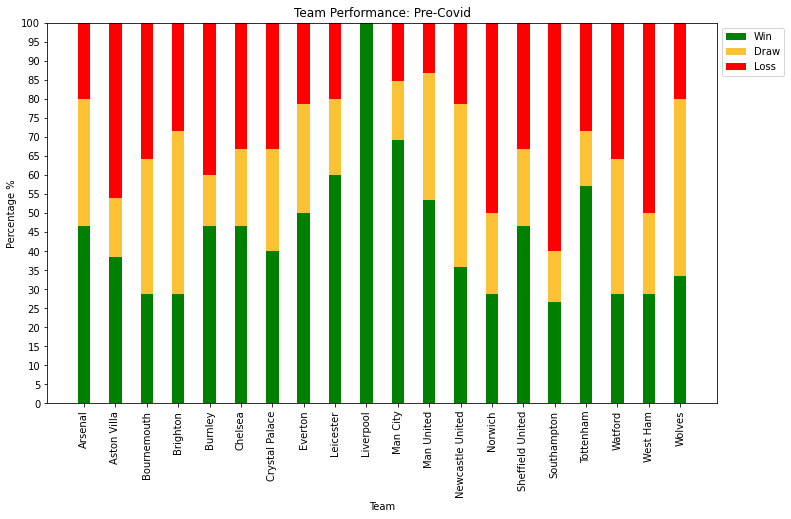

In [156]:
ind = np.arange(20)
width = 0.4

p1 = plt.bar(ind, home_result_counts.pre_covid_win_percentage, width, color='green')
p2 = plt.bar(ind, home_result_counts.pre_covid_draw_percentage, width, color='#fac234', bottom=home_result_counts.pre_covid_win_percentage)
p3 = plt.bar(ind, home_result_counts.pre_covid_loss_percentage, width, color='red',bottom=home_result_counts.pre_covid_win_percentage+home_result_counts.pre_covid_draw_percentage)

plt.ylabel('Percentage %')
plt.xlabel('Team')
plt.title('Team Performance: Pre-Covid')
plt.xticks(ind, unique_teams, rotation=90)
plt.yticks(np.arange(0, 101, 5))
plt.legend((p1[0], p2[0], p3[0]), ('Win', 'Draw', 'Loss'), bbox_to_anchor=(1, 1))


plt.show()

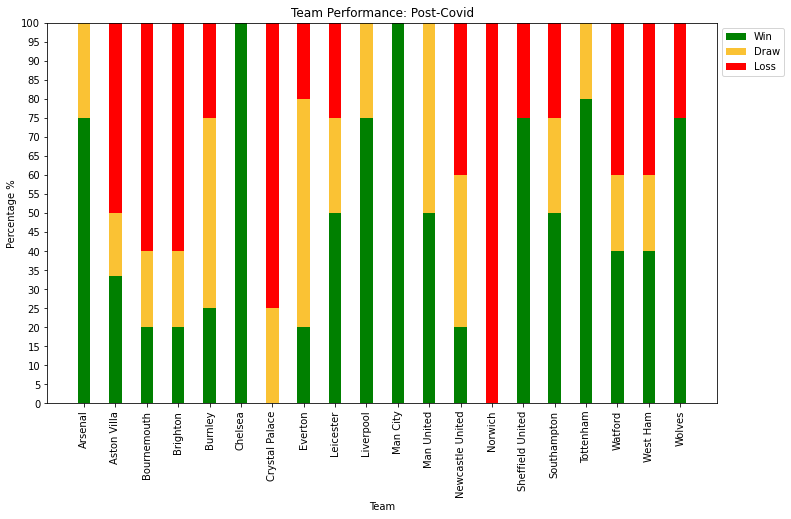

In [157]:
ind = np.arange(20)
width = 0.4

p1 = plt.bar(ind, home_result_counts.post_covid_win_percentage, width, color='green')
p2 = plt.bar(ind, home_result_counts.post_covid_draw_percentage, width, color='#fac234', bottom=home_result_counts.post_covid_win_percentage)
p3 = plt.bar(ind, home_result_counts.post_covid_loss_percentage, width, color='red',bottom=home_result_counts.post_covid_win_percentage+home_result_counts.post_covid_draw_percentage)

plt.ylabel('Percentage %')
plt.xlabel('Team')
plt.title('Team Performance: Post-Covid')
plt.xticks(ind, unique_teams, rotation=90)
plt.yticks(np.arange(0, 101, 5))
plt.legend((p1[0], p2[0], p3[0]), ('Win', 'Draw', 'Loss'), bbox_to_anchor=(1, 1))


plt.show()

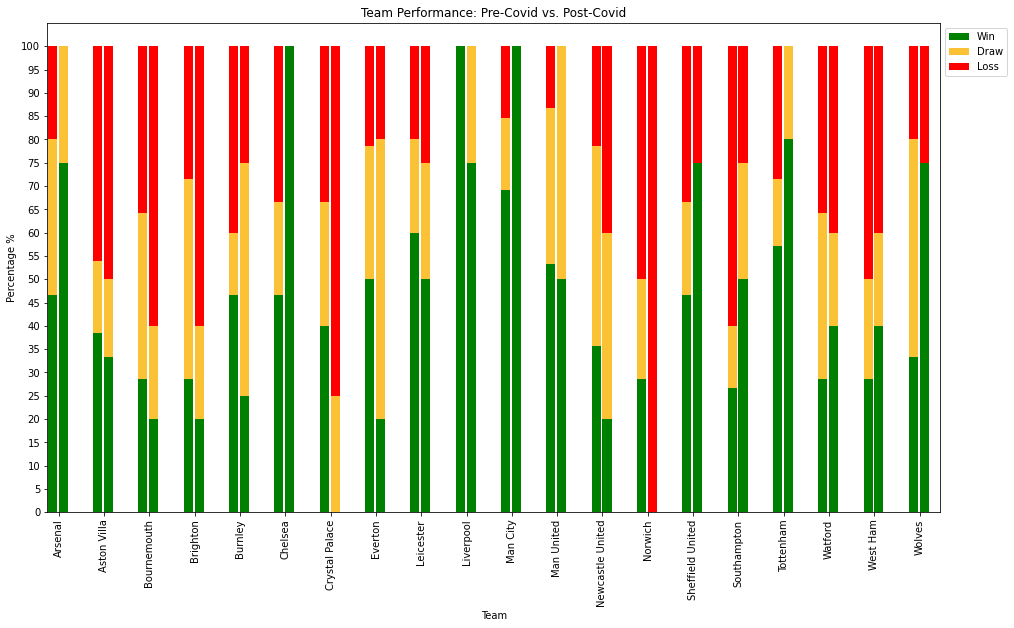

In [218]:
ind = np.arange(20)
plt.rcParams['figure.figsize'] = [16, 9]
cmap = mpl.colors.ListedColormap(['green', '#fac234', 'red'])

fig, ax = plt.subplots()
home_result_counts[['pre_covid_win_percentage', 'pre_covid_draw_percentage', 'pre_covid_loss_percentage']].plot.bar(stacked=True, width=0.2, position=1.2, colormap=cmap, ax=ax)
home_result_counts[['post_covid_win_percentage', 'post_covid_draw_percentage', 'post_covid_loss_percentage']].plot.bar(stacked=True, width=0.2, position=0, colormap=cmap, ax=ax)

plt.ylabel('Percentage %')
plt.xlabel('Team')
plt.title('Team Performance: Pre-Covid vs. Post-Covid')
plt.xticks(ind, unique_teams, rotation=90)
plt.yticks(np.arange(0, 101, 5))
plt.legend(('Win', 'Draw', 'Loss'), bbox_to_anchor=(1, 1))
# plt.margins(0.01)
# plt.margins(0.1, None)

plt.show()


As we can see from the above graph, the performance of some teams changed after the Covid break. We can assume that they may have been effected by the change in circumstances such as having no fans at their home stadium.

Unfortunately the amount of matches after the Covid break is low and may not be enough to make a proper comparison. So we will pull in the current season's data and check if teams are still being effected by the lack of fans. This should give us a bigger sample to work with and hopefully make a more thourough conclusion.

---

### Currrent Season Comparison

Pull in data from the current season.

This data is not complete as the season is currently in progress.

In [159]:
new_season_matches_df = pd.read_csv('epl-dataset/epl2021.csv')

In [160]:
new_season_matches_df = new_season_matches_df[[
    'Date',
    'HomeTeam', 
    'AwayTeam', 
    'FTR'
]]

In [161]:
new_season_matches_df = new_season_matches_df.rename(columns={
    'Date': 'date',
    'HomeTeam': 'home_team',
    'AwayTeam': 'away_team',
    'FTR': 'full_time_result',
})

In [162]:
new_season_matches_df.date = pd.to_datetime(new_season_matches_df.date.astype(str), format='%d/%m/%Y') 

In [163]:
new_season_matches_df.dtypes

date                datetime64[ns]
home_team                   object
away_team                   object
full_time_result            object
dtype: object

In [164]:
new_season_matches_df.shape

(96, 4)

In [165]:
new_season_matches_df

,date,home_team,away_team,full_time_result
0,2020-09-12,Fulham,Arsenal,A
1,2020-09-12,Crystal Palace,Southampton,H
2,2020-09-12,Liverpool,Leeds,H
3,2020-09-12,West Ham,Newcastle,A
4,2020-09-13,West Brom,Leicester,A
...,...,...,...,...
91,2020-11-28,Everton,Leeds,A
92,2020-11-28,West Brom,Sheffield United,H
93,2020-11-29,Southampton,Man United,A
94,2020-11-29,Chelsea,Tottenham,D


In [166]:
new_season_matches_df.loc[new_season_matches_df['home_team'] == 'Newcastle', 'home_team'] = 'Newcastle United'
new_season_matches_df.loc[new_season_matches_df['away_team'] == 'Newcastle', 'away_team'] = 'Newcastle United'

In [167]:
new_season_matches_df

,date,home_team,away_team,full_time_result
0,2020-09-12,Fulham,Arsenal,A
1,2020-09-12,Crystal Palace,Southampton,H
2,2020-09-12,Liverpool,Leeds,H
3,2020-09-12,West Ham,Newcastle United,A
4,2020-09-13,West Brom,Leicester,A
...,...,...,...,...
91,2020-11-28,Everton,Leeds,A
92,2020-11-28,West Brom,Sheffield United,H
93,2020-11-29,Southampton,Man United,A
94,2020-11-29,Chelsea,Tottenham,D


In [168]:
new_teams = ['Fulham', 'Leeds', 'West Brom']
new_season_matches_df = new_season_matches_df[~new_season_matches_df.home_team.isin(new_teams)].reset_index(drop=True)

In [169]:
relegated_teams = ['Bournemouth', 'Norwich', 'Watford']
home_result_counts_extended = home_result_counts[~home_result_counts.home_team.isin(relegated_teams)].reset_index(drop=True)

home_result_counts_extended['new_season_match_count'] = new_season_matches_df.groupby(['home_team']).size().reset_index(name='new_season_match_count').sort_values('home_team', ascending=True).new_season_match_count

new_season_home_win_matches = new_season_matches_df[new_season_matches_df.full_time_result == 'H'] 
# .groupby(['home_team']).size().reset_index(name='new_season_win_count').sort_values('home_team', ascending=True).new_season_win_count
new_season_home_loss_matches = new_season_matches_df[new_season_matches_df.full_time_result == 'A']
new_season_home_draw_matches = new_season_matches_df[new_season_matches_df.full_time_result == 'D']

# new_season_home_win_matches = new_season_home_win_matches.groupby(['home_team']).size().reset_index(name='new_season_home_win_count').sort_values('home_team', ascending=False)
new_season_home_win_counts = new_season_home_win_matches.groupby(['home_team']).size().reset_index(name='new_season_win_count').sort_values('home_team', ascending=True)
new_season_home_loss_counts = new_season_home_loss_matches.groupby(['home_team']).size().reset_index(name='new_season_loss_count').sort_values('home_team', ascending=True)
new_season_home_draw_counts = new_season_home_draw_matches.groupby(['home_team']).size().reset_index(name='new_season_draw_count').sort_values('home_team', ascending=True)



In [170]:
non_win_missing_teams = new_season_matches_df[~new_season_matches_df.home_team.isin(new_season_home_win_matches.home_team)].home_team.unique()
non_loss_missing_teams = new_season_matches_df[~new_season_matches_df.home_team.isin(new_season_home_loss_matches.home_team)].home_team.unique()
non_draw_missing_teams = new_season_matches_df[~new_season_matches_df.home_team.isin(new_season_home_draw_matches.home_team)].home_team.unique()

print(non_win_missing_teams)
print(non_loss_missing_teams)
print(non_draw_missing_teams)


['Brighton' 'Sheffield United']
['Liverpool']
['Liverpool' 'Arsenal' 'Southampton' 'Newcastle United' 'Leicester'
 'Aston Villa' 'Burnley']


In [171]:
new_season_home_win_counts = new_season_home_win_counts.append([{'home_team': x, 'new_season_win_count': 0} for x in non_win_missing_teams], ignore_index=True).sort_values('home_team', ascending=True).reset_index(drop=True)
new_season_home_loss_counts = new_season_home_loss_counts.append([{'home_team': x, 'new_season_loss_count': 0} for x in non_loss_missing_teams], ignore_index=True).sort_values('home_team', ascending=True).reset_index(drop=True)
new_season_home_draw_counts = new_season_home_draw_counts.append([{'home_team': x, 'new_season_draw_count': 0} for x in non_draw_missing_teams], ignore_index=True).sort_values('home_team', ascending=True).reset_index(drop=True)


In [172]:
win_styler = new_season_home_win_counts.style.set_table_attributes("style='display:inline'").set_caption('New Season Home Wins')
loss_styler = new_season_home_loss_counts.style.set_table_attributes("style='display:inline'").set_caption('New Season Home Losses')
draw_styler = new_season_home_draw_counts.style.set_table_attributes("style='display:inline'").set_caption('New Season Home Draws')

display_html(win_styler._repr_html_()+loss_styler._repr_html_()+draw_styler._repr_html_(), raw=True)


,home_team,new_season_win_count
0,Arsenal,2
1,Aston Villa,2
2,Brighton,0
3,Burnley,1
4,Chelsea,2
5,Crystal Palace,2
6,Everton,2
7,Leicester,2
8,Liverpool,5
9,Man City,2


In [173]:
home_result_counts_extended = home_result_counts_extended.merge(
    new_season_home_win_counts,
    how='left', 
    on='home_team'
).merge(
    new_season_home_loss_counts, 
    how='left', 
    on='home_team'
).merge(
    new_season_home_draw_counts, 
    how='left',
    on='home_team'
)

In [174]:
home_result_counts_extended

,home_team,pre_covid_match_count,post_covid_match_count,pre_covid_win_count,pre_covid_loss_count,pre_covid_draw_count,post_covid_win_count,post_covid_loss_count,post_covid_draw_count,pre_covid_win_percentage,pre_covid_loss_percentage,pre_covid_draw_percentage,post_covid_win_percentage,post_covid_loss_percentage,post_covid_draw_percentage,new_season_match_count,new_season_win_count,new_season_loss_count,new_season_draw_count
0,Arsenal,15,4,7,3,5,3,0,1,46.666667,20.000000,33.333333,75.000000,0.0,25.000000,5,2,3,0
1,Aston Villa,13,6,5,6,2,2,3,1,38.461538,46.153846,15.384615,33.333333,50.0,16.666667,5,2,3,0
2,Brighton,14,5,4,4,6,1,3,1,28.571429,28.571429,42.857143,20.000000,60.0,20.000000,5,0,2,3
3,Burnley,15,4,7,6,2,1,1,2,46.666667,40.000000,13.333333,25.000000,25.0,50.000000,4,1,3,0
4,Chelsea,15,4,7,5,3,4,0,0,46.666667,33.333333,20.000000,100.000000,0.0,0.000000,5,2,1,2
5,Crystal Palace,15,4,6,5,4,0,3,1,40.000000,33.333333,26.666667,0.000000,75.0,25.000000,5,2,2,1
6,Everton,14,5,7,3,4,1,1,3,50.000000,21.428571,28.571429,20.000000,20.0,60.000000,5,2,2,1
7,Leicester,15,4,9,3,3,2,1,1,60.000000,20.000000,20.000000,50.000000,25.0,25.000000,4,2,2,0
8,Liverpool,15,4,15,0,0,3,0,1,100.000000,0.000000,0.000000,75.000000,0.0,25.000000,5,5,0,0
9,Man City,13,6,9,2,2,6,0,0,69.230769,15.384615,15.384615,100.000000,0.0,0.000000,4,2,1,1


In [175]:
home_result_counts_extended['new_season_win_percentage'] = (100 / home_result_counts_extended.new_season_match_count) * home_result_counts_extended.new_season_win_count
home_result_counts_extended['new_season_loss_percentage'] = (100 / home_result_counts_extended.new_season_match_count) * home_result_counts_extended.new_season_loss_count
home_result_counts_extended['new_season_draw_percentage'] = (100 / home_result_counts_extended.new_season_match_count) * home_result_counts_extended.new_season_draw_count


In [176]:
home_result_counts_extended

,home_team,pre_covid_match_count,post_covid_match_count,pre_covid_win_count,pre_covid_loss_count,pre_covid_draw_count,post_covid_win_count,post_covid_loss_count,post_covid_draw_count,pre_covid_win_percentage,...,post_covid_win_percentage,post_covid_loss_percentage,post_covid_draw_percentage,new_season_match_count,new_season_win_count,new_season_loss_count,new_season_draw_count,new_season_win_percentage,new_season_loss_percentage,new_season_draw_percentage
0,Arsenal,15,4,7,3,5,3,0,1,46.666667,...,75.000000,0.0,25.000000,5,2,3,0,40.0,60.0,0.0
1,Aston Villa,13,6,5,6,2,2,3,1,38.461538,...,33.333333,50.0,16.666667,5,2,3,0,40.0,60.0,0.0
2,Brighton,14,5,4,4,6,1,3,1,28.571429,...,20.000000,60.0,20.000000,5,0,2,3,0.0,40.0,60.0
3,Burnley,15,4,7,6,2,1,1,2,46.666667,...,25.000000,25.0,50.000000,4,1,3,0,25.0,75.0,0.0
4,Chelsea,15,4,7,5,3,4,0,0,46.666667,...,100.000000,0.0,0.000000,5,2,1,2,40.0,20.0,40.0
5,Crystal Palace,15,4,6,5,4,0,3,1,40.000000,...,0.000000,75.0,25.000000,5,2,2,1,40.0,40.0,20.0
6,Everton,14,5,7,3,4,1,1,3,50.000000,...,20.000000,20.0,60.000000,5,2,2,1,40.0,40.0,20.0
7,Leicester,15,4,9,3,3,2,1,1,60.000000,...,50.000000,25.0,25.000000,4,2,2,0,50.0,50.0,0.0
8,Liverpool,15,4,15,0,0,3,0,1,100.000000,...,75.000000,0.0,25.000000,5,5,0,0,100.0,0.0,0.0
9,Man City,13,6,9,2,2,6,0,0,69.230769,...,100.000000,0.0,0.000000,4,2,1,1,50.0,25.0,25.0


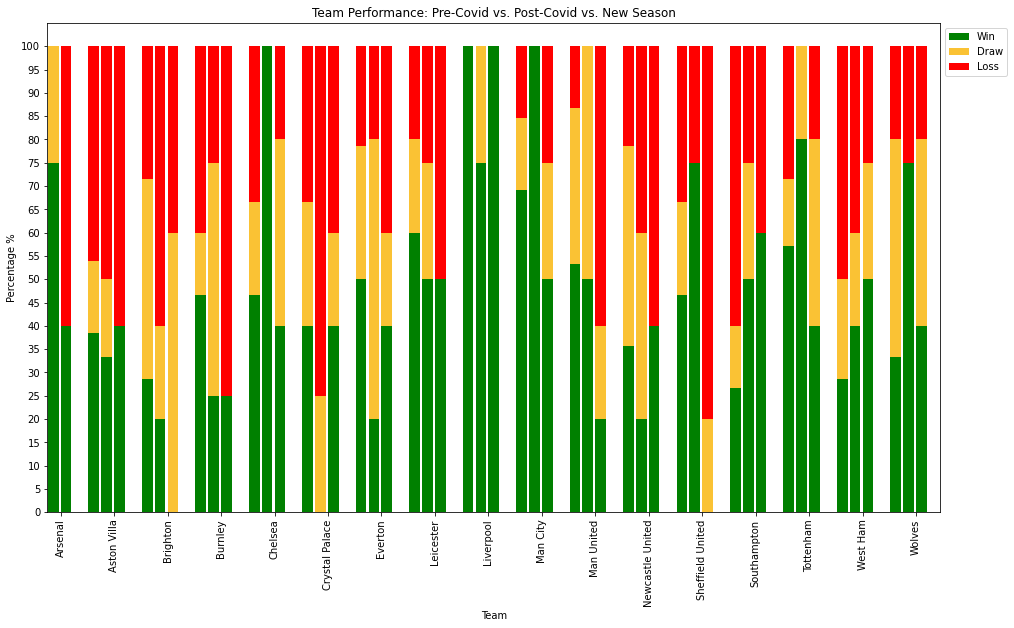

In [217]:
graph_teams = home_result_counts_extended.home_team

ind = np.arange(len(home_result_counts_extended))
plt.rcParams['figure.figsize'] = [16, 9]
cmap = mpl.colors.ListedColormap(['green', '#fac234', 'red'])

fig, ax = plt.subplots()
home_result_counts_extended[['pre_covid_win_percentage', 'pre_covid_draw_percentage', 'pre_covid_loss_percentage']].plot.bar(stacked=True, width=0.2, position=2.4, colormap=cmap, ax=ax)
home_result_counts_extended[['post_covid_win_percentage', 'post_covid_draw_percentage', 'post_covid_loss_percentage']].plot.bar(stacked=True, width=0.2, position=1.2, colormap=cmap, ax=ax)
home_result_counts_extended[['new_season_win_percentage', 'new_season_draw_percentage', 'new_season_loss_percentage']].plot.bar(stacked=True, width=0.2, position=0, colormap=cmap, ax=ax)

plt.ylabel('Percentage %')
plt.xlabel('Team')
plt.title('Team Performance: Pre-Covid vs. Post-Covid vs. New Season')
plt.xticks(ind, graph_teams, rotation=90)
plt.yticks(np.arange(0, 101, 5))
plt.legend(('Win', 'Draw', 'Loss'), bbox_to_anchor=(1, 1))

plt.show()

In [178]:
home_result_counts_combined = home_result_counts_extended

home_result_counts_extended['combined_post_covid_win_percentage'] = (100 / (home_result_counts_combined.new_season_match_count + home_result_counts_combined.post_covid_match_count)) * (home_result_counts_combined.new_season_win_count + home_result_counts_combined.post_covid_win_count)
home_result_counts_extended['combined_post_covid_loss_percentage'] = (100 / (home_result_counts_combined.new_season_match_count + home_result_counts_combined.post_covid_match_count)) * (home_result_counts_combined.new_season_loss_count + home_result_counts_combined.post_covid_loss_count)
home_result_counts_extended['combined_post_covid_draw_percentage'] = (100 / (home_result_counts_combined.new_season_match_count + home_result_counts_combined.post_covid_match_count)) * (home_result_counts_combined.new_season_draw_count + home_result_counts_combined.post_covid_draw_count)



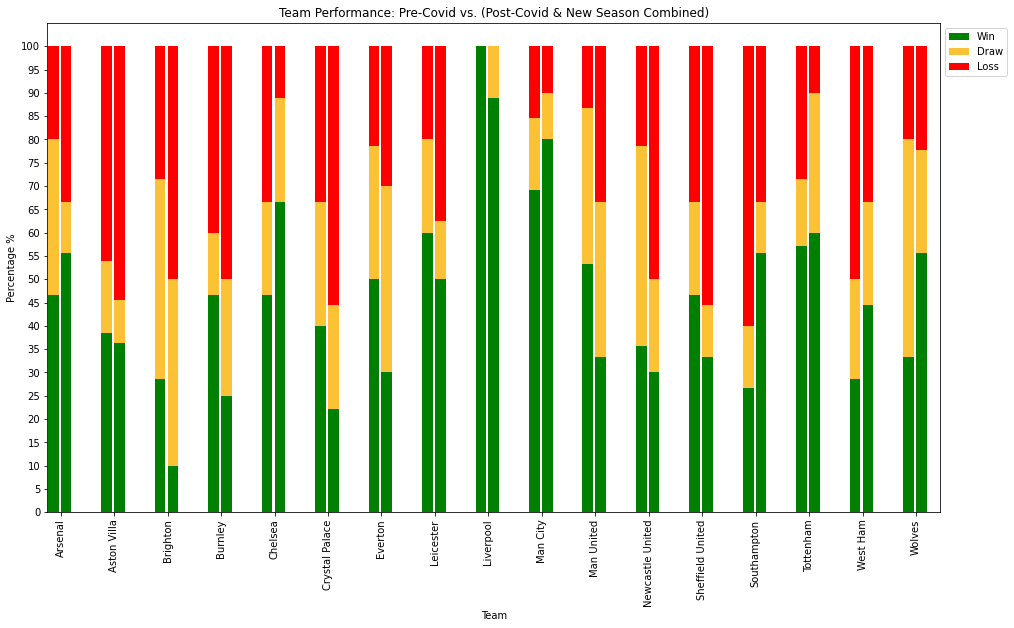

In [210]:
graph_teams = home_result_counts_extended.home_team

ind = np.arange(len(home_result_counts_extended))
plt.rcParams['figure.figsize'] = [16, 9]
cmap = mpl.colors.ListedColormap(['green', '#fac234', 'red'])

fig, ax = plt.subplots()
home_result_counts_extended[['pre_covid_win_percentage', 'pre_covid_draw_percentage', 'pre_covid_loss_percentage']].plot.bar(stacked=True, width=0.2, position=1.2, colormap=cmap, ax=ax)
home_result_counts_extended[['combined_post_covid_win_percentage', 'combined_post_covid_draw_percentage', 'combined_post_covid_loss_percentage']].plot.bar(stacked=True, width=0.2, position=0, colormap=cmap, ax=ax)

plt.ylabel('Percentage %')
plt.xlabel('Team')
plt.title('Team Performance: Pre-Covid vs. (Post-Covid & New Season Combined)')
plt.xticks(ind, graph_teams, rotation=90)
plt.yticks(np.arange(0, 101, 5))
plt.legend(('Win', 'Draw', 'Loss'), bbox_to_anchor=(1, 1))

plt.show()

---

### Visualising Team Performance

In [180]:
def get_match_points_earned(is_at_home, result):
    if result == 'D':
        return 1
    if is_at_home and result == 'H':
        return 3
    if is_at_home and result == 'A':
        return 0
    if not is_at_home and result == 'H':
        return 0
    if not is_at_home and result == 'A':
        return 3

In [181]:
team_points = pd.DataFrame([{'team': x.home_team, 'date': x.date, 'points_earned': get_match_points_earned(True, x.full_time_result)} for x in matches_df.itertuples()])
team_points = team_points.append([{'team': x.away_team, 'date': x.date, 'points_earned': get_match_points_earned(False, x.full_time_result)} for x in matches_df.itertuples()]).sort_values(['team', 'date'], ascending=True).reset_index(drop=True)

team_points


,team,date,points_earned
0,Arsenal,2019-08-11,3
1,Arsenal,2019-08-17,3
2,Arsenal,2019-08-24,0
3,Arsenal,2019-09-01,1
4,Arsenal,2019-09-15,1
...,...,...,...
755,Wolves,2020-07-08,0
756,Wolves,2020-07-12,3
757,Wolves,2020-07-15,1
758,Wolves,2020-07-20,3


In [182]:
split_teams = [team_points[team_points.team == x] for x in unique_teams]

In [183]:
np.asarray(split_teams[0].points_earned.cumsum())

array([ 3,  6,  6,  7,  8, 11, 12, 15, 15, 16, 17, 17, 18, 19, 19, 22, 22,
       23, 24, 24, 27, 28, 29, 30, 31, 34, 37, 40, 40, 40, 43, 46, 49, 50,
       50, 53, 53, 56])

In [184]:
split_team_points = [team.assign(points_sum=team.points_earned.cumsum()) for team in split_teams]

In [185]:
split_team_points[0]['game_week'] = range(1, 39)

In [186]:
split_team_points = [team.assign(game_week= range(1, 39)) for team in split_team_points]

In [187]:
split_team_points

[       team       date  points_earned  points_sum  game_week
 0   Arsenal 2019-08-11              3           3          1
 1   Arsenal 2019-08-17              3           6          2
 2   Arsenal 2019-08-24              0           6          3
 3   Arsenal 2019-09-01              1           7          4
 4   Arsenal 2019-09-15              1           8          5
 5   Arsenal 2019-09-22              3          11          6
 6   Arsenal 2019-09-30              1          12          7
 7   Arsenal 2019-10-06              3          15          8
 8   Arsenal 2019-10-21              0          15          9
 9   Arsenal 2019-10-27              1          16         10
 10  Arsenal 2019-11-02              1          17         11
 11  Arsenal 2019-11-09              0          17         12
 12  Arsenal 2019-11-23              1          18         13
 13  Arsenal 2019-12-01              1          19         14
 14  Arsenal 2019-12-05              0          19         15
 15  Ars

In [188]:
final_standings = [team.iloc[team['points_sum'].argmax()] for team in split_team_points]
final_standings = pd.DataFrame(final_standings).sort_values('points_sum', ascending=False).reset_index(drop=True)

final_standings


,team,date,points_earned,points_sum,game_week
0,Liverpool,2020-07-26,3,99,38
1,Man City,2020-07-26,3,81,38
2,Man United,2020-07-26,3,66,38
3,Chelsea,2020-07-26,3,66,38
4,Leicester,2020-07-16,3,62,36
5,Tottenham,2020-07-26,1,59,38
6,Wolves,2020-07-20,3,59,37
7,Arsenal,2020-07-26,3,56,38
8,Burnley,2020-07-18,3,54,37
9,Sheffield United,2020-07-11,3,54,35


In [189]:
sorted_team_names = final_standings.team

sorted_team_names

0            Liverpool
1             Man City
2           Man United
3              Chelsea
4            Leicester
5            Tottenham
6               Wolves
7              Arsenal
8              Burnley
9     Sheffield United
10         Southampton
11             Everton
12    Newcastle United
13      Crystal Palace
14            Brighton
15            West Ham
16         Aston Villa
17         Bournemouth
18             Watford
19             Norwich
Name: team, dtype: object

In [190]:
split_team_points

[       team       date  points_earned  points_sum  game_week
 0   Arsenal 2019-08-11              3           3          1
 1   Arsenal 2019-08-17              3           6          2
 2   Arsenal 2019-08-24              0           6          3
 3   Arsenal 2019-09-01              1           7          4
 4   Arsenal 2019-09-15              1           8          5
 5   Arsenal 2019-09-22              3          11          6
 6   Arsenal 2019-09-30              1          12          7
 7   Arsenal 2019-10-06              3          15          8
 8   Arsenal 2019-10-21              0          15          9
 9   Arsenal 2019-10-27              1          16         10
 10  Arsenal 2019-11-02              1          17         11
 11  Arsenal 2019-11-09              0          17         12
 12  Arsenal 2019-11-23              1          18         13
 13  Arsenal 2019-12-01              1          19         14
 14  Arsenal 2019-12-05              0          19         15
 15  Ars

In [191]:
test = next((x for x in split_team_points if x.team[7] == 'Arsenal'), None)

test

,team,date,points_earned,points_sum,game_week
0,Arsenal,2019-08-11,3,3,1
1,Arsenal,2019-08-17,3,6,2
2,Arsenal,2019-08-24,0,6,3
3,Arsenal,2019-09-01,1,7,4
4,Arsenal,2019-09-15,1,8,5
5,Arsenal,2019-09-22,3,11,6
6,Arsenal,2019-09-30,1,12,7
7,Arsenal,2019-10-06,3,15,8
8,Arsenal,2019-10-21,0,15,9
9,Arsenal,2019-10-27,1,16,10


In [192]:
# Sort all of the points summaries by the the end of season points, ie. Liverpool should be first, followed by Man City

sorted_split_team_points = list(map(lambda x: next((y for y in split_team_points if y.team.any() == x), None), sorted_team_names))


In [193]:
sorted_split_team_points

[          team       date  points_earned  points_sum  game_week
 342  Liverpool 2019-08-09              3           3          1
 343  Liverpool 2019-08-17              3           6          2
 344  Liverpool 2019-08-24              3           9          3
 345  Liverpool 2019-08-31              3          12          4
 346  Liverpool 2019-09-14              3          15          5
 347  Liverpool 2019-09-22              3          18          6
 348  Liverpool 2019-09-28              3          21          7
 349  Liverpool 2019-10-05              3          24          8
 350  Liverpool 2019-10-20              1          25          9
 351  Liverpool 2019-10-27              3          28         10
 352  Liverpool 2019-11-02              3          31         11
 353  Liverpool 2019-11-10              3          34         12
 354  Liverpool 2019-11-23              3          37         13
 355  Liverpool 2019-11-30              3          40         14
 356  Liverpool 2019-12-0

Text(0.5, 1.0, 'Team Points Accumulation')

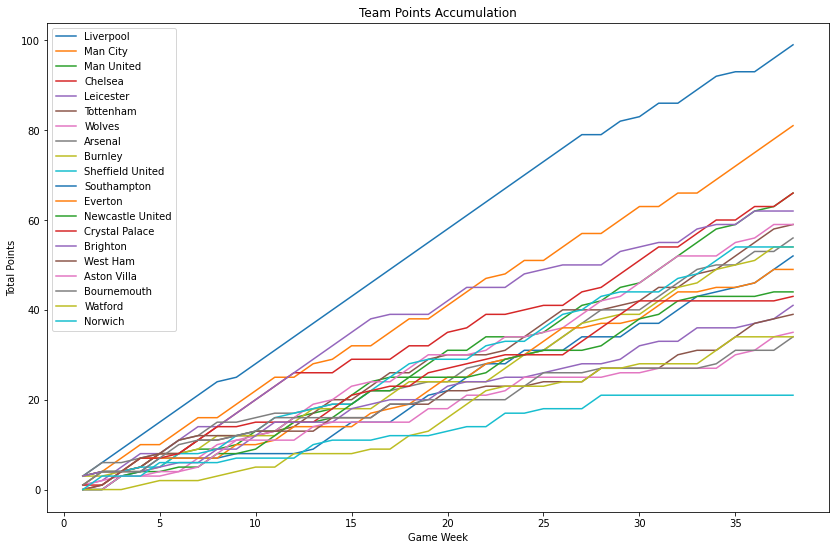

In [194]:
plt.rcParams['figure.figsize'] = [14, 9]

fig, ax = plt.subplots()
[team.plot(ax=ax, x='game_week', y='points_sum', kind='line', label=sorted_team_names[idx]) for idx, team in enumerate(sorted_split_team_points)]
plt.xlabel('Game Week')
plt.ylabel('Total Points')
plt.title('Team Points Accumulation')
# plt.locator_params(axis='x', nbins=3)
# ax.set_xticklabels(['Season Start', 'Season Mid', 'Season End'])


This graph shows each team's progress through the season in regards to total points accumulated in respect to the game weeks. This doesn't show the Covid Break, nor does it make it easy to see the effect on the team performance after the break.

Text(0.5, 1.0, 'Team Points Accumulation By Date')

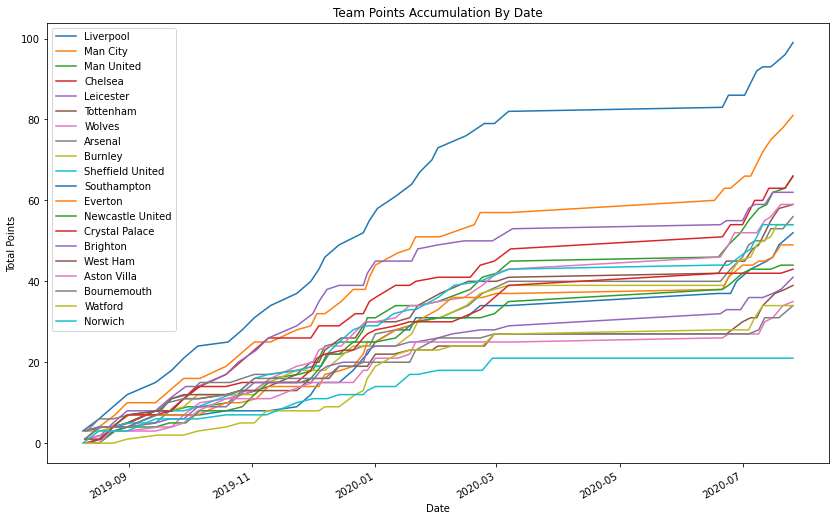

In [195]:
fig, ax = plt.subplots()
[team.plot(ax=ax, x='date', y='points_sum', kind='line', label=sorted_team_names[idx]) for idx, team in enumerate(sorted_split_team_points)]
plt.xlabel('Date')
plt.ylabel('Total Points')
plt.title('Team Points Accumulation By Date')


This graph is similar to the one above, but it is in respect to the date each match took place, rather than the game week. This gives depicts the Covid break which is shown by a flat line for each team from March to June. 

Not all Covid-break "flat lines" are flat. This is due to a team winning or drawing when they returned in June, the flat line skews upwards (only losses remain flat as their total points are uneffected). 

This graph isn't very easy to read as there are 20 different lines and they cross over each other a lot. It's harder to figure out which line belongs to each team. This would be a bigger issue for someone with colour-blindness. 

We will try an alternative way to depict the team performance trends on another graph.

In [196]:
def calculate_trend_points(points_earned, current_trend_points):
    if points_earned == 3:
        return current_trend_points + 1
    if points_earned == 1:
        return current_trend_points
    if points_earned == 0:
        return current_trend_points - 1

To depict each team's trend, we are going to create a new points system.

Rather than using the normal points system:
- Win: +3
- Draw +1
- Loss: 0

We will use the following:
- Win: +1
- Draw: 0
- Loss: -1

If a team was to win all 38 games during a season, their total __trend_points__ will be __38__

If a team was to lose all 38 games during a season, their total __trend_points__ will be __-38__

If a team was to win 19 games and lose 19 games during a season, their total __trend_points__ will be __0__


This should cause teams with poor performance to skew downwards, away from the higher performing teams. Average teams should continue in a straighter line across the graph. We should expect to see a __<__ shaped graph

In [197]:
# total_earned = 0
sorted_split_team_points = [team.assign(trend_points=0) for team in sorted_split_team_points]
# sorted_split_team_points = [team.assign(trend_points=calculate_trend_points(team.points_earned)) ]

team_point_trends = []

for team in sorted_split_team_points:
    team = team.reset_index(drop=True)
    for i in range(0, len(team)):
        team.loc[i, 'trend_points'] = calculate_trend_points(team.loc[i, 'points_earned'], team.loc[i-1, 'trend_points']) if i > 0 else calculate_trend_points(team.loc[i, 'points_earned'], 0)
    team_point_trends.append(team)
    

In [198]:
team_point_trends

[         team       date  points_earned  points_sum  game_week  trend_points
 0   Liverpool 2019-08-09              3           3          1             1
 1   Liverpool 2019-08-17              3           6          2             2
 2   Liverpool 2019-08-24              3           9          3             3
 3   Liverpool 2019-08-31              3          12          4             4
 4   Liverpool 2019-09-14              3          15          5             5
 5   Liverpool 2019-09-22              3          18          6             6
 6   Liverpool 2019-09-28              3          21          7             7
 7   Liverpool 2019-10-05              3          24          8             8
 8   Liverpool 2019-10-20              1          25          9             8
 9   Liverpool 2019-10-27              3          28         10             9
 10  Liverpool 2019-11-02              3          31         11            10
 11  Liverpool 2019-11-10              3          34         12 

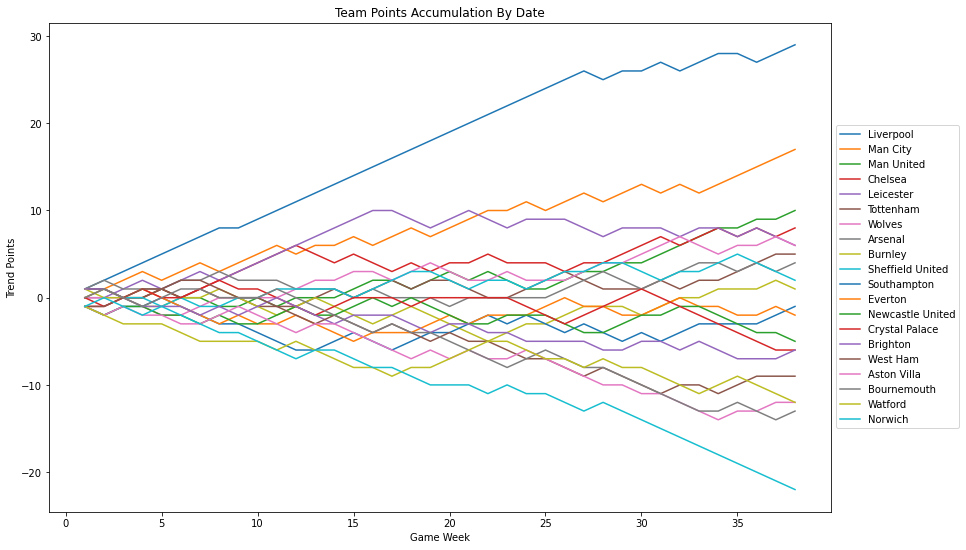

In [199]:
fig, ax = plt.subplots()
[team.plot(ax=ax, x='game_week', y='trend_points', kind='line', label=sorted_team_names[idx]) for idx, team in enumerate(team_point_trends)]
plt.xlabel('Game Week')
plt.ylabel('Trend Points')
plt.title('Team Points Accumulation By Date')
plt.legend(bbox_to_anchor=(1, 0.8), bbox_transform=ax.transAxes)


This graph is easier to read compared to the last 2 as the lines do not cross over as much. Teams with bad performance skew downwards. Each team's line drifts further apart as time goes on. 

This graph is done by Game Week, so the effect of the Covid Break is not obvious. 

We can re-do this graph by Date instead.

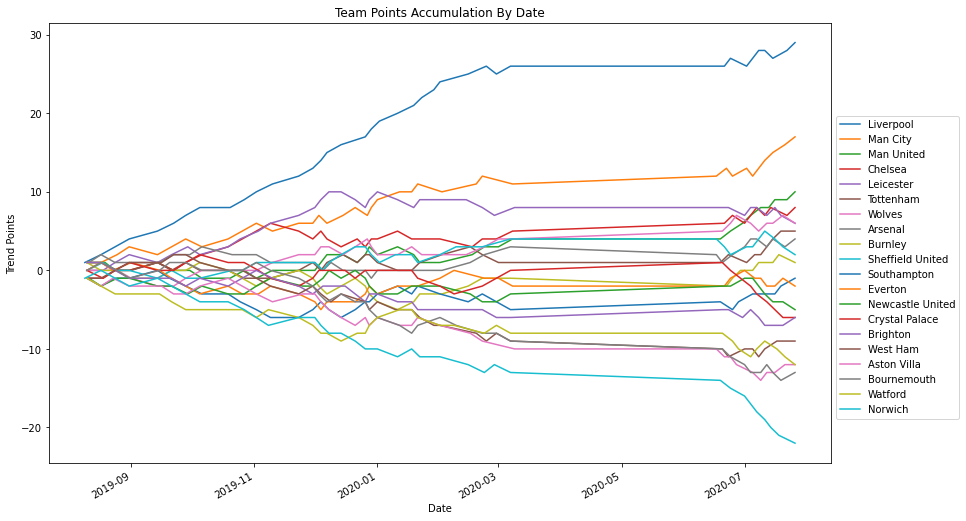

In [200]:
fig, ax = plt.subplots()
[team.plot(ax=ax, x='date', y='trend_points', kind='line', label=sorted_team_names[idx]) for idx, team in enumerate(team_point_trends)]
plt.xlabel('Date')
plt.ylabel('Trend Points')
plt.title('Team Points Accumulation By Date')
plt.legend(bbox_to_anchor=(1, 0.8), bbox_transform=ax.transAxes)

This graph makes it easier to visualise the effect of the Covid Break again, but it still isn't very easy to read as there are 20 different lines. It's difficult to figure out which line belongs to each team, except for the teams with the highest and lowest points, ie. Liverpool and Norwich.

We will break out each team's trend line into separate graphs and make comparisons.

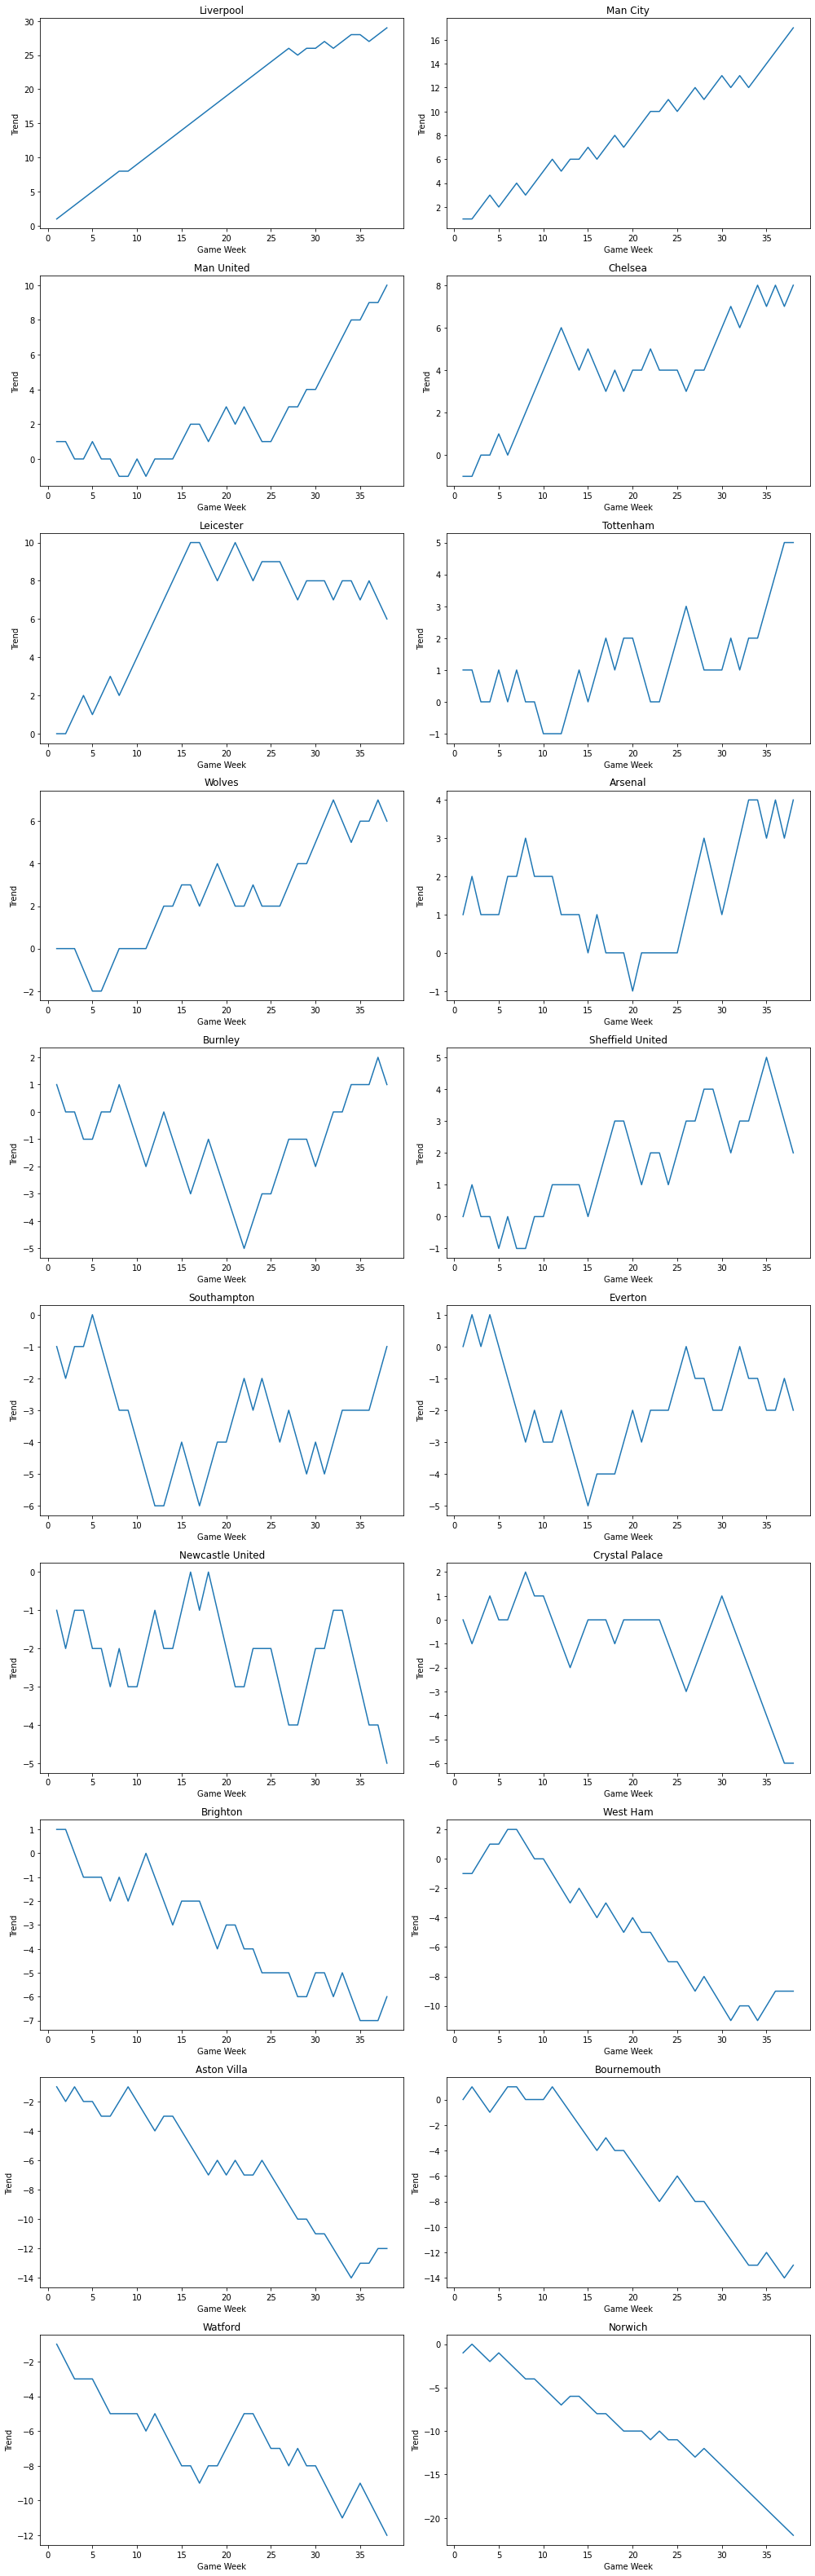

In [201]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(14, 44), tight_layout=True)

for ax, team in zip(axes.ravel(), team_point_trends):
    ax.plot(team.game_week, team.trend_points)
    ax.set_title(team.team.any())
    ax.set_xlabel('Game Week')
    ax.set_ylabel('Trend')


We can see each team's trend throughout the season from the set of individual team graphs above. This is easier to visualise and distinguish between each team compared to the single graph above.

We cannot distinguish the trend after the Covid Break, so we will change the color of the line from the point of the Covid Break.

We want to plot the line by game week, but we will need to split the line on the date, rather than game week because not every team completed Game Week 29 when the break began. Some teams finished on Game Week 28, so splitting the line on the game week will present incorrect data.

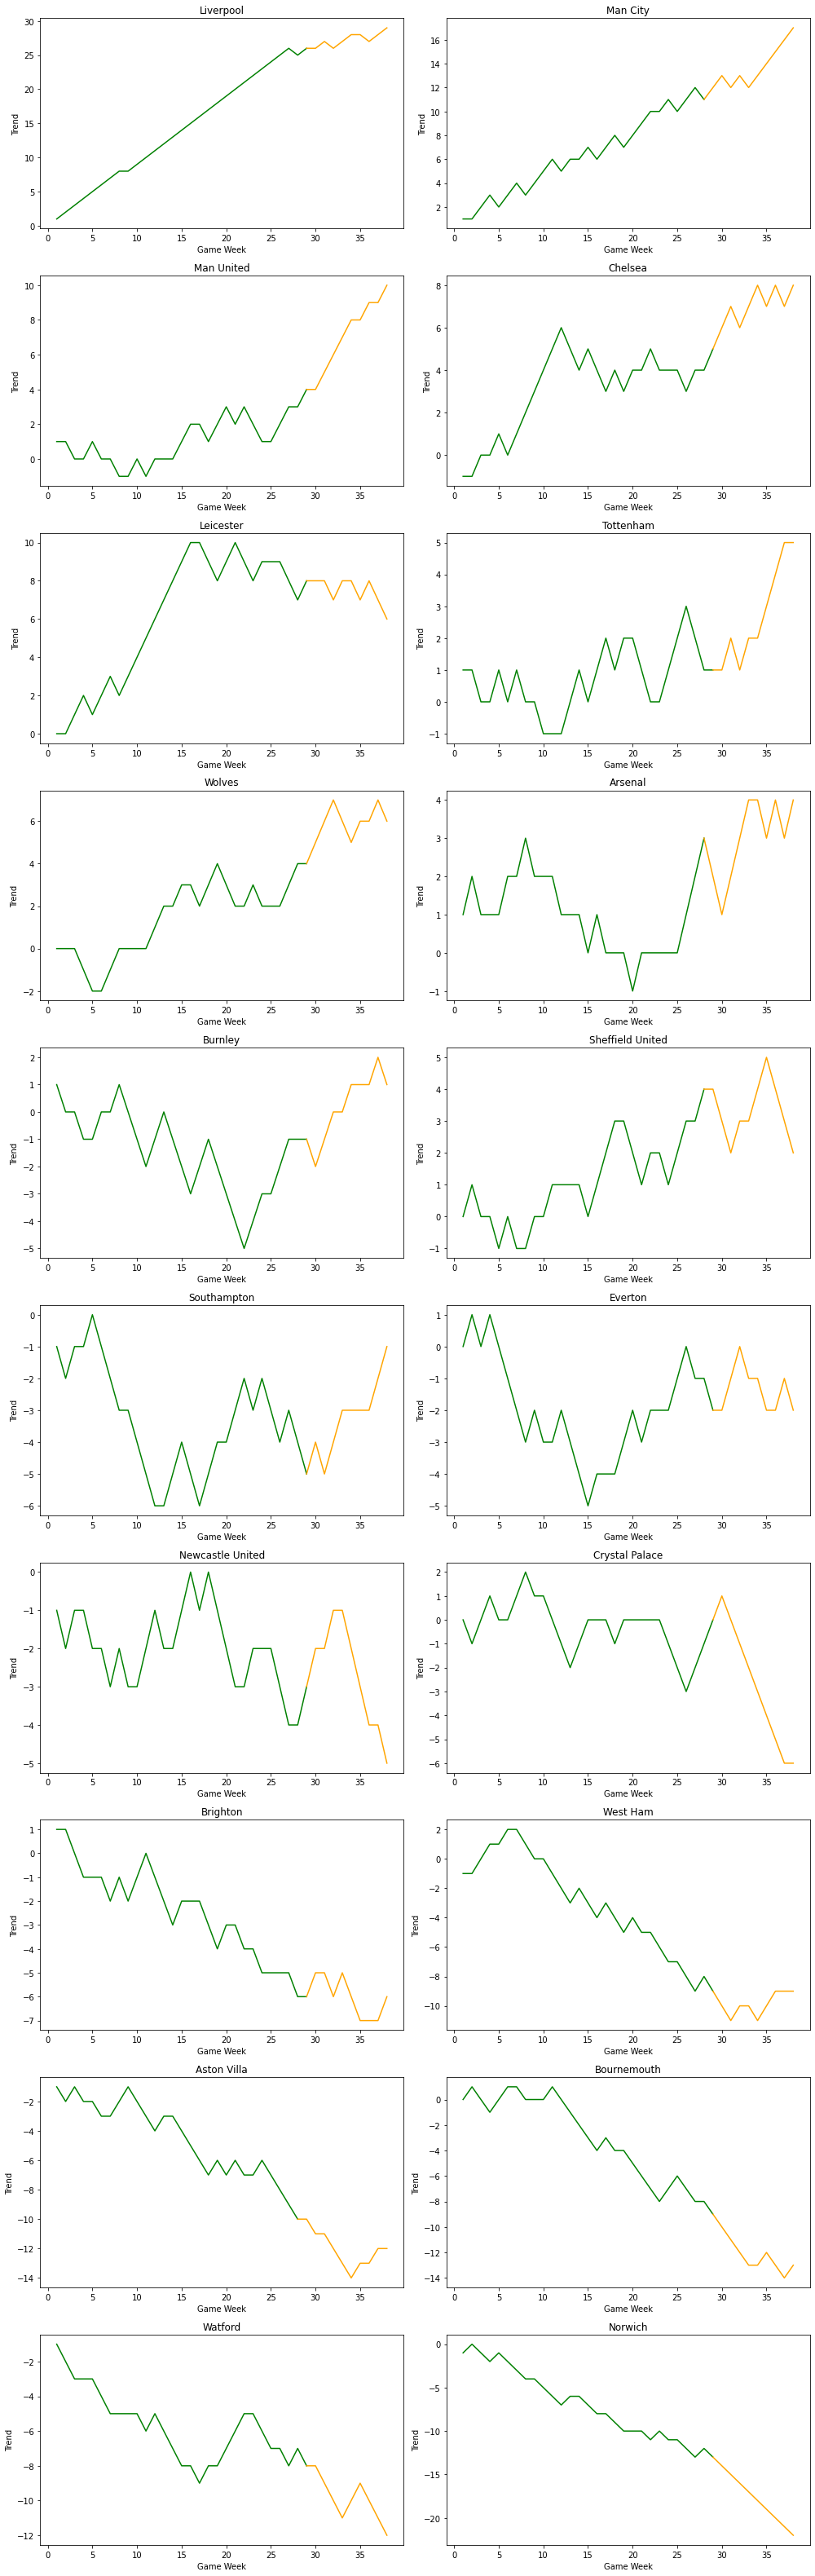

In [202]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(14, 44), tight_layout=True)

covid_break_start_date = datetime.datetime(2020, 3, 9, 23, 59)

for ax, team in zip(axes.ravel(), team_point_trends):
    pre_covid_points = team[team.date < covid_break_start_date]
    post_covid_points = team[team.date > covid_break_start_date]
        
    post_covid_points = post_covid_points.append(pre_covid_points.iloc[-1]).sort_values('game_week') # Add point to join lines

    ax.plot(pre_covid_points.game_week, pre_covid_points.trend_points, color='green')
    ax.plot(post_covid_points.game_week, post_covid_points.trend_points, color='orange')

    ax.set_title(team.team.any())
    ax.set_xlabel('Game Week')
    ax.set_ylabel('Trend')


We can now see the team performance trend before and after the Covid Break. 

For comparison, we can do the same again, but with the x-axis being the Date rather than the Game-Week.

We will need to add a third colour for the break itself.

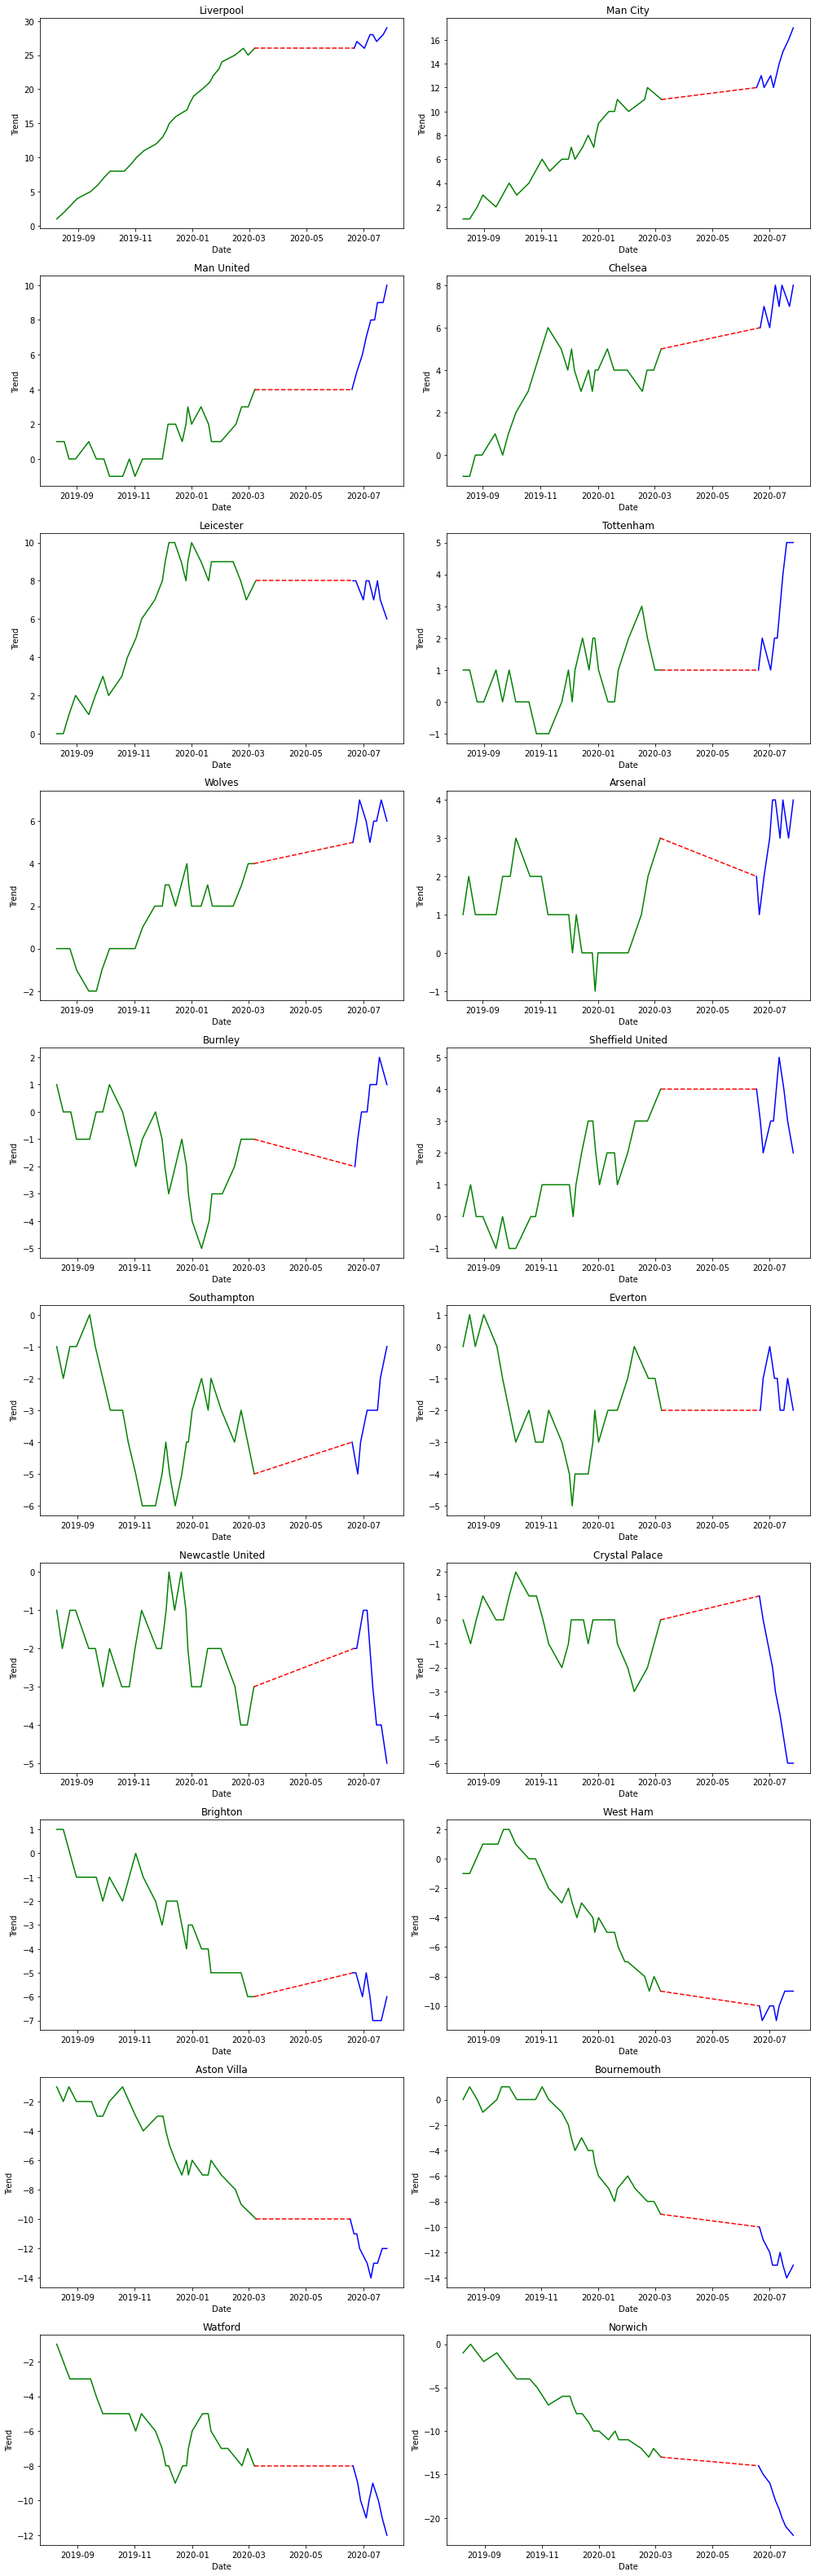

In [203]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(14, 44), tight_layout=True)

covid_break_start_date = datetime.datetime(2020, 3, 9, 23, 59)
covid_break_end_date = datetime.datetime(2020, 6, 17, 0, 0)

for ax, team in zip(axes.ravel(), team_point_trends):
    pre_covid_points = team[team.date < covid_break_start_date]
    post_covid_points = team[team.date > covid_break_start_date]
    
    ax.plot(pre_covid_points.date, pre_covid_points.trend_points, color='green')
    
    covid_break_data = {'date': [pre_covid_points.iloc[-1].date, post_covid_points.iloc[0].date], 
                        'trend_points': [pre_covid_points.iloc[-1].trend_points, post_covid_points.iloc[0].trend_points]}
    covid_break_edges = pd.DataFrame(covid_break_data, columns=['date', 'trend_points'])
    
    ax.plot(covid_break_edges.date, covid_break_edges.trend_points, '--', color='red')

    ax.plot(post_covid_points.date, post_covid_points.trend_points, color='blue')

    ax.set_title(team.team.any())
    ax.set_xlabel('Date')
    ax.set_ylabel('Trend')


In [205]:
players_df.hist()

ValueError: view limit minimum -36881.63125 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units